In [74]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

import seaborn as sns

# Exploratory Data Analysis

In [75]:
df_house = pd.read_csv("./src/kc_house_data.csv")
df_house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [76]:
df_house.shape

(21613, 21)

In [77]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [78]:
df_house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

<AxesSubplot:>

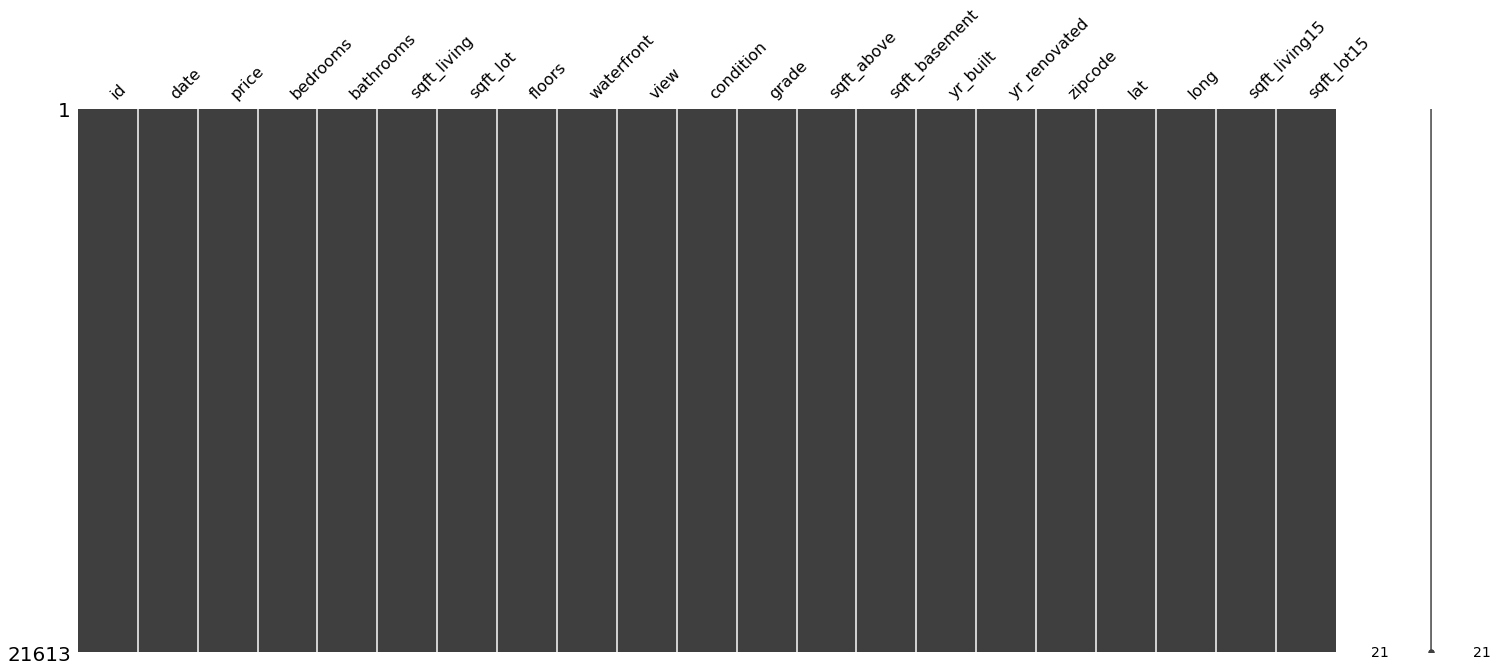

In [79]:
msno.matrix(df_house)

## Check if any duplicates

In [80]:
df_house.shape

(21613, 21)

In [81]:
df_house[["id"]].duplicated().value_counts()

False    21436
True       177
dtype: int64

In [82]:
df_house[["id"]].duplicated().sum()

177

In [83]:
df_house[df_house[["id"]].duplicated() == True]["id"]

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20181    7853400250
20613    2724049222
20670    8564860270
20780    6300000226
21581    7853420110
Name: id, Length: 177, dtype: int64

In [84]:
pd.set_option("display.max_columns", None)

In [85]:
df_house[df_house["id"]==6021501535]

id             date     price  bedrooms  bathrooms  sqft_living  \
93  6021501535  20140725T000000  430000.0         3        1.5         1580   
94  6021501535  20141223T000000  700000.0         3        1.5         1580   

    sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
93      5000     1.0           0     0          3      8        1290   
94      5000     1.0           0     0          3      8        1290   

    sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
93            290      1939             0    98117  47.687 -122.386   
94            290      1939             0    98117  47.687 -122.386   

    sqft_living15  sqft_lot15  
93           1570        4500  
94           1570        4500

In [86]:
for id in df_house[df_house[["id"]].duplicated() == True]["id"]:
    display(df_house[df_house["id"]==id])

id             date     price  bedrooms  bathrooms  sqft_living  \
93  6021501535  20140725T000000  430000.0         3        1.5         1580   
94  6021501535  20141223T000000  700000.0         3        1.5         1580   

    sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
93      5000     1.0           0     0          3      8        1290   
94      5000     1.0           0     0          3      8        1290   

    sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
93            290      1939             0    98117  47.687 -122.386   
94            290      1939             0    98117  47.687 -122.386   

    sqft_living15  sqft_lot15  
93           1570        4500  
94           1570        4500

id             date      price  bedrooms  bathrooms  sqft_living  \
313  4139480200  20140618T000000  1384000.0         4       3.25         4290   
314  4139480200  20141209T000000  1400000.0         4       3.25         4290   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
313     12103     1.0           0     3          3     11        2690   
314     12103     1.0           0     3          3     11        2690   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
313           1600      1997             0    98006  47.5503 -122.102   
314           1600      1997             0    98006  47.5503 -122.102   

     sqft_living15  sqft_lot15  
313           3860       11244  
314           3860       11244

id             date     price  bedrooms  bathrooms  sqft_living  \
324  7520000520  20140905T000000  232000.0         2        1.0         1240   
325  7520000520  20150311T000000  240500.0         2        1.0         1240   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
324     12092     1.0           0     0          3      6         960   
325     12092     1.0           0     0          3      6         960   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
324            280      1922          1984    98146  47.4957 -122.352   
325            280      1922          1984    98146  47.4957 -122.352   

     sqft_living15  sqft_lot15  
324           1820        7460  
325           1820        7460

id             date     price  bedrooms  bathrooms  sqft_living  \
345  3969300030  20140723T000000  165000.0         4        1.0         1000   
346  3969300030  20141229T000000  239900.0         4        1.0         1000   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
345      7134     1.0           0     0          3      6        1000   
346      7134     1.0           0     0          3      6        1000   

     sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
345              0      1943             0    98178  47.4897 -122.24   
346              0      1943             0    98178  47.4897 -122.24   

     sqft_living15  sqft_lot15  
345           1020        7138  
346           1020        7138

id             date     price  bedrooms  bathrooms  sqft_living  \
371  2231500030  20141001T000000  315000.0         4       2.25         2180   
372  2231500030  20150324T000000  530000.0         4       2.25         2180   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
371     10754     1.0           0     0          5      7        1100   
372     10754     1.0           0     0          5      7        1100   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
371           1080      1954             0    98133  47.7711 -122.341   
372           1080      1954             0    98133  47.7711 -122.341   

     sqft_living15  sqft_lot15  
371           1810        6929  
372           1810        6929

id             date     price  bedrooms  bathrooms  sqft_living  \
717  8820903380  20140728T000000  452000.0         6       2.25         2660   
718  8820903380  20150102T000000  730000.0         6       2.25         2660   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
717     13579     2.0           0     0          3      7        2660   
718     13579     2.0           0     0          3      7        2660   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
717              0      1937          1990    98125  47.7142 -122.286   
718              0      1937          1990    98125  47.7142 -122.286   

     sqft_living15  sqft_lot15  
717           1120        8242  
718           1120        8242

id             date     price  bedrooms  bathrooms  sqft_living  \
823  726049190  20141002T000000  287500.0         3        1.0         1810   
824  726049190  20150218T000000  431000.0         3        1.0         1810   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
823      7200     1.0           0     0          4      7        1130   
824      7200     1.0           0     0          4      7        1130   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
823            680      1954             0    98133  47.7493 -122.351   
824            680      1954             0    98133  47.7493 -122.351   

     sqft_living15  sqft_lot15  
823           1810        8100  
824           1810        8100

id             date     price  bedrooms  bathrooms  sqft_living  \
836  8682262400  20140718T000000  430000.0         2       1.75         1350   
837  8682262400  20150513T000000  419950.0         2       1.75         1350   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
836      4003     1.0           0     0          3      8        1350   
837      4003     1.0           0     0          3      8        1350   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
836              0      2004             0    98053  47.7176 -122.033   
837              0      2004             0    98053  47.7176 -122.033   

     sqft_living15  sqft_lot15  
836           1350        4479  
837           1350        4479

id             date     price  bedrooms  bathrooms  sqft_living  \
1085  9834200885  20140717T000000  360000.0         4        2.5         2080   
1086  9834200885  20150420T000000  550000.0         4        2.5         2080   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1085      4080     1.0           0     0          5      7        1040   
1086      4080     1.0           0     0          5      7        1040   

      sqft_basement  yr_built  yr_renovated  zipcode     lat    long  \
1085           1040      1962             0    98144  47.572 -122.29   
1086           1040      1962             0    98144  47.572 -122.29   

      sqft_living15  sqft_lot15  
1085           1340        4080  
1086           1340        4080

id             date     price  bedrooms  bathrooms  sqft_living  \
1128  8062900070  20140909T000000  272000.0         5        1.5         2550   
1129  8062900070  20150213T000000  369000.0         5        1.5         2550   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1128      6300     1.0           0     0          4      7        1560   
1129      6300     1.0           0     0          4      7        1560   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1128            990      1959             0    98056  47.5014 -122.172   
1129            990      1959             0    98056  47.5014 -122.172   

      sqft_living15  sqft_lot15  
1128           1380        6300  
1129           1380        6300

id             date     price  bedrooms  bathrooms  sqft_living  \
1202  1231000510  20140922T000000  263000.0         3       1.75         1490   
1203  1231000510  20150504T000000  510000.0         3       1.75         1490   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1202      3800     1.0           0     0          3      6         700   
1203      3800     1.0           0     0          3      6         700   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
1202            790      1913             0    98118  47.5554 -122.27   
1203            790      1913             0    98118  47.5554 -122.27   

      sqft_living15  sqft_lot15  
1202           2180        4000  
1203           2180        4000

id             date     price  bedrooms  bathrooms  sqft_living  \
1234  6117501820  20140618T000000  250275.0         2        1.0          790   
1235  6117501820  20150428T000000  435000.0         2        1.0          790   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1234     11234     1.0           0     0          4      6         790   
1235     11234     1.0           0     0          4      6         790   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1234              0      1942             0    98166  47.4413 -122.349   
1235              0      1942             0    98166  47.4413 -122.349   

      sqft_living15  sqft_lot15  
1234           1930       11871  
1235           1930       11871

id             date     price  bedrooms  bathrooms  sqft_living  \
1450  2228900270  20140812T000000  215000.0         2        1.0         1010   
1451  2228900270  20150212T000000  302000.0         2        1.0         1010   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1450      6000     1.0           0     0          4      6        1010   
1451      6000     1.0           0     0          4      6        1010   

      sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
1450              0      1944             0    98133  47.771 -122.353   
1451              0      1944             0    98133  47.771 -122.353   

      sqft_living15  sqft_lot15  
1450           1610        7313  
1451           1610        7313

id             date     price  bedrooms  bathrooms  sqft_living  \
1464  3630120700  20140513T000000  757000.0         3       3.25         3190   
1465  3630120700  20150107T000000  765000.0         3       3.25         3190   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1464      5283     2.0           0     0          3      9        3190   
1465      5283     2.0           0     0          3      9        3190   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1464              0      2007             0    98029  47.5534 -122.002   
1465              0      2007             0    98029  47.5534 -122.002   

      sqft_living15  sqft_lot15  
1464           2950        5198  
1465           2950        5198

id             date     price  bedrooms  bathrooms  sqft_living  \
1576  7888000390  20140627T000000  140000.0         3        1.0         1060   
1577  7888000390  20150401T000000  235000.0         3        1.0         1060   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1576      7473     1.0           0     0          3      7        1060   
1577      7473     1.0           0     0          3      7        1060   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1576              0      1959             0    98198  47.3699 -122.309   
1577              0      1959             0    98198  47.3699 -122.309   

      sqft_living15  sqft_lot15  
1576           1320        7912  
1577           1320        7912

id             date     price  bedrooms  bathrooms  sqft_living  \
1864  2143700830  20141006T000000  207000.0         4        2.5         2100   
1865  2143700830  20150312T000000  370000.0         4        2.5         2100   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1864     19680     1.5           0     0          3      6        2100   
1865     19680     1.5           0     0          3      6        2100   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
1864              0      1914             0    98055  47.4787 -122.23   
1865              0      1914             0    98055  47.4787 -122.23   

      sqft_living15  sqft_lot15  
1864           1340       12300  
1865           1340       12300

id             date     price  bedrooms  bathrooms  sqft_living  \
2038  3395040550  20140728T000000  250000.0         3        2.5         1530   
2039  3395040550  20150429T000000  320000.0         3        2.5         1530   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2038      2890     2.0           0     0          3      7        1530   
2039      2890     2.0           0     0          3      7        1530   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2038              0      2001             0    98108  47.5434 -122.293   
2039              0      2001             0    98108  47.5434 -122.293   

      sqft_living15  sqft_lot15  
2038           1540        2890  
2039           1540        2890

id             date     price  bedrooms  bathrooms  sqft_living  \
2126  4345000510  20141015T000000  180500.0         3        2.5         1800   
2127  4345000510  20150428T000000  325000.0         3        2.5         1800   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2126      8518     2.0           0     0          3      7        1800   
2127      8518     2.0           0     0          3      7        1800   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2126              0      1996             0    98030  47.3643 -122.185   
2127              0      1996             0    98030  47.3643 -122.185   

      sqft_living15  sqft_lot15  
2126           1770        7570  
2127           1770        7570

id             date     price  bedrooms  bathrooms  sqft_living  \
2493  9407110710  20141107T000000  195000.0         3       1.75         1510   
2494  9407110710  20150226T000000  322000.0         3       1.75         1510   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2493      8400     1.0           0     0          2      7         980   
2494      8400     1.0           0     0          2      7         980   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2493            530      1979             0    98045  47.4476 -121.771   
2494            530      1979             0    98045  47.4476 -121.771   

      sqft_living15  sqft_lot15  
2493           1500       10125  
2494           1500       10125

id             date     price  bedrooms  bathrooms  sqft_living  \
2496  1000102  20140916T000000  280000.0         6        3.0         2400   
2497  1000102  20150422T000000  300000.0         6        3.0         2400   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2496      9373     2.0           0     0          3      7        2400   
2497      9373     2.0           0     0          3      7        2400   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2496              0      1991             0    98002  47.3262 -122.214   
2497              0      1991             0    98002  47.3262 -122.214   

      sqft_living15  sqft_lot15  
2496           2060        7316  
2497           2060        7316

id             date     price  bedrooms  bathrooms  sqft_living  \
2502  1781500435  20140820T000000  260000.0         3       1.75         1580   
2503  1781500435  20150225T000000  575000.0         3       1.75         1580   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2502      7344     1.0           0     0          5      7        1580   
2503      7344     1.0           0     0          5      7        1580   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
2502              0      1911             0    98126  47.5256 -122.38   
2503              0      1911             0    98126  47.5256 -122.38   

      sqft_living15  sqft_lot15  
2502           1580        6207  
2503           1580        6207

id             date     price  bedrooms  bathrooms  sqft_living  \
2531  1232000810  20140912T000000  340000.0         3        2.5         1400   
2532  1232000810  20150326T000000  537000.0         3        2.5         1400   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2531      4800     1.0           0     0          3      7        1200   
2532      4800     1.0           0     0          3      7        1200   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2531            200      1921             0    98117  47.6865 -122.379   
2532            200      1921             0    98117  47.6865 -122.379   

      sqft_living15  sqft_lot15  
2531           1440        3840  
2532           1440        3840

id             date      price  bedrooms  bathrooms  \
2564  7856400240  20140627T000000  1620000.0         4        3.0   
2565  7856400240  20150211T000000  1650000.0         4        3.0   

      sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
2564         3900      9750     1.0           0     4          5     10   
2565         3900      9750     1.0           0     4          5     10   

      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
2564        2520           1380      1972             0    98006  47.5605   
2565        2520           1380      1972             0    98006  47.5605   

         long  sqft_living15  sqft_lot15  
2564 -122.158           3410        9450  
2565 -122.158           3410        9450

id             date     price  bedrooms  bathrooms  sqft_living  \
2631  7983000200  20141005T000000  169575.0         3        1.0         1300   
2632  7983000200  20150225T000000  250000.0         3        1.0         1300   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2631      8284     1.0           0     0          3      7        1300   
2632      8284     1.0           0     0          3      7        1300   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2631              0      1968             0    98003  47.3327 -122.306   
2632              0      1968             0    98003  47.3327 -122.306   

      sqft_living15  sqft_lot15  
2631           1360        7848  
2632           1360        7848

id             date     price  bedrooms  bathrooms  sqft_living  \
2976  9136103130  20141201T000000  430000.0         2        1.5         1090   
2977  9136103130  20150512T000000  685000.0         2        1.5         1090   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2976      4013     1.5           0     0          3      7        1090   
2977      4013     1.5           0     0          3      7        1090   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2976              0      1900             0    98103  47.6652 -122.338   
2977              0      1900             0    98103  47.6652 -122.338   

      sqft_living15  sqft_lot15  
2976           1390        4013  
2977           1390        4013

id             date     price  bedrooms  bathrooms  sqft_living  \
3033  5083000375  20141027T000000  170000.0         3        1.0         1310   
3034  5083000375  20150319T000000  235000.0         3        1.0         1310   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3033      9529     1.0           0     0          3      7        1310   
3034      9529     1.0           0     0          3      7        1310   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
3033              0      1956             0    98198  47.4105 -122.295   
3034              0      1956             0    98198  47.4105 -122.295   

      sqft_living15  sqft_lot15  
3033           1330        9529  
3034           1330        9529

id             date     price  bedrooms  bathrooms  sqft_living  \
3298  7409700215  20140606T000000  550000.0         3        1.5         1900   
3299  7409700215  20150313T000000  921500.0         3        1.5         1900   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3298      5000     1.5           0     0          3      7        1640   
3299      5000     1.5           0     0          3      7        1640   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
3298            260      1926             0    98115  47.6779 -122.294   
3299            260      1926             0    98115  47.6779 -122.294   

      sqft_living15  sqft_lot15  
3298           2090        5000  
3299           2090        5000

id             date     price  bedrooms  bathrooms  sqft_living  \
3540  1823049202  20140610T000000  175000.0         6        1.5         1930   
3541  1823049202  20150107T000000  326000.0         6        1.5         1930   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3540      8400     1.0           0     0          3      7        1030   
3541      8400     1.0           0     0          3      7        1030   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
3540            900      1971             0    98146  47.4869 -122.34   
3541            900      1971             0    98146  47.4869 -122.34   

      sqft_living15  sqft_lot15  
3540           1780        9520  
3541           1780        9520

id             date     price  bedrooms  bathrooms  sqft_living  \
3623  2767602141  20140905T000000  525000.0         3        1.5         1380   
3624  2767602141  20141222T000000  650000.0         3        1.5         1380   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3623      4290     1.0           0     0          3      7        1080   
3624      4290     1.0           0     0          3      7        1080   

      sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
3623            300      1955             0    98107  47.674 -122.379   
3624            300      1955             0    98107  47.674 -122.379   

      sqft_living15  sqft_lot15  
3623           1510        3900  
3624           1510        3900

id             date     price  bedrooms  bathrooms  sqft_living  \
3756  1254200015  20141216T000000  405000.0         3        2.5         2260   
3757  1254200015  20150408T000000  625000.0         3        2.5         2260   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3756      5500     1.5           0     0          3      7        1280   
3757      5500     1.5           0     0          3      7        1280   

      sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
3756            980      1910             0    98117  47.681 -122.388   
3757            980      1910             0    98117  47.681 -122.388   

      sqft_living15  sqft_lot15  
3756           1790        5355  
3757           1790        5355

id             date     price  bedrooms  bathrooms  sqft_living  \
3785  723049156  20140523T000000  149000.0         3        1.0         1700   
3786  723049156  20141112T000000  284700.0         3        1.0         1700   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3785      8645     1.0           0     0          3      6        1700   
3786      8645     1.0           0     0          3      6        1700   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
3785              0      1955             0    98146  47.4899 -122.337   
3786              0      1955             0    98146  47.4899 -122.337   

      sqft_living15  sqft_lot15  
3785           1500        7980  
3786           1500        7980

id             date     price  bedrooms  bathrooms  sqft_living  \
3793  4435000705  20140708T000000  160000.0         3        1.0         1350   
3794  4435000705  20150309T000000  255500.0         3        1.0         1350   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3793      8700     1.5           0     0          3      6        1350   
3794      8700     1.5           0     0          3      6        1350   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
3793              0      1942             0    98188  47.4497 -122.289   
3794              0      1942             0    98188  47.4497 -122.289   

      sqft_living15  sqft_lot15  
3793           1300        8700  
3794           1300        8700

id             date     price  bedrooms  bathrooms  sqft_living  \
3878  4364700600  20141216T000000  216000.0         3        1.0         1010   
3879  4364700600  20150330T000000  390000.0         3        1.0         1010   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3878      7920     1.0           0     0          3      6        1010   
3879      7920     1.0           0     0          3      6        1010   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
3878              0      1925             0    98126  47.5249 -122.37   
3879              0      1925             0    98126  47.5249 -122.37   

      sqft_living15  sqft_lot15  
3878           1520        7560  
3879           1520        7560

id             date     price  bedrooms  bathrooms  sqft_living  \
3950  1825069031  20140814T000000  550000.0         4       1.75         2410   
3951  1825069031  20141016T000000  550000.0         4       1.75         2410   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
3950      8447     2.0           0     3          4      8        2060   
3951      8447     2.0           0     3          4      8        2060   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
3950            350      1936          1980    98074  47.6499 -122.088   
3951            350      1936          1980    98074  47.6499 -122.088   

      sqft_living15  sqft_lot15  
3950           2520       14789  
3951           2520       14789

id             date     price  bedrooms  bathrooms  sqft_living  \
4077  3262300940  20141107T000000  875000.0         3        1.0         1220   
4078  3262300940  20150210T000000  940000.0         3        1.0         1220   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
4077      8119     1.0           0     0          4      7        1220   
4078      8119     1.0           0     0          4      7        1220   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4077              0      1955             0    98039  47.6328 -122.236   
4078              0      1955             0    98039  47.6328 -122.236   

      sqft_living15  sqft_lot15  
4077           1910        8119  
4078           1910        8119

id             date     price  bedrooms  bathrooms  sqft_living  \
4342  9353300600  20140624T000000  348500.0         3        1.5         1360   
4343  9353300600  20150326T000000  370000.0         3        1.5         1360   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
4342     10726     1.0           0     0          4      7        1360   
4343     10726     1.0           0     0          4      7        1360   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4342              0      1966             0    98059  47.4948 -122.134   
4343              0      1966             0    98059  47.4948 -122.134   

      sqft_living15  sqft_lot15  
4342           1650       10726  
4343           1650       10726

id             date     price  bedrooms  bathrooms  sqft_living  \
4872  1524079093  20140827T000000  275000.0         3       1.75         1300   
4873  1524079093  20150318T000000  369500.0         3       1.75         1300   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
4872     20700     1.0           0     0          3      7        1300   
4873     20700     1.0           0     0          3      7        1300   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4872              0      1962             0    98024  47.5587 -121.904   
4873              0      1962             0    98024  47.5587 -121.904   

      sqft_living15  sqft_lot15  
4872           1930       37638  
4873           1930       37638

id             date      price  bedrooms  bathrooms  \
4922  9809000020  20140513T000000  1895000.0         5       2.25   
4923  9809000020  20150313T000000  1940000.0         5       2.25   

      sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
4922         3120     16672     2.0           0     0          4      9   
4923         3120     16672     2.0           0     0          4      9   

      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
4922        3120              0      1969             0    98004  47.6458   
4923        3120              0      1969             0    98004  47.6458   

         long  sqft_living15  sqft_lot15  
4922 -122.219           3740       17853  
4923 -122.219           3740       17853

id             date     price  bedrooms  bathrooms  sqft_living  \
5244  3303000130  20150116T000000  370000.0         3       2.25         1770   
5245  3303000130  20150428T000000  520000.0         3       2.25         1770   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5244      7667     1.0           0     0          3      8        1270   
5245      7667     1.0           0     0          3      8        1270   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5244            500      1966             0    98177  47.7724 -122.362   
5245            500      1966             0    98177  47.7724 -122.362   

      sqft_living15  sqft_lot15  
5244           2180        8103  
5245           2180        8103

id             date     price  bedrooms  bathrooms  sqft_living  \
5251  7524400250  20140822T000000  424240.0         3        2.0         2080   
5252  7524400250  20141124T000000  589950.0         3        2.0         2080   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5251     12094     2.0           0     0          4      8        2080   
5252     12094     2.0           0     0          4      8        2080   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5251              0      1982             0    98052  47.7035 -122.164   
5252              0      1982             0    98052  47.7035 -122.164   

      sqft_living15  sqft_lot15  
5251           2230       12204  
5252           2230       12204

id             date     price  bedrooms  bathrooms  sqft_living  \
5272  4204400098  20150119T000000  250000.0         5       1.75         2190   
5273  4204400098  20150421T000000  385000.0         5       1.75         2190   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5272      8250     1.0           0     2          3      7        1190   
5273      8250     1.0           0     2          3      7        1190   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5272           1000      1963             0    98055  47.4887 -122.223   
5273           1000      1963             0    98055  47.4887 -122.223   

      sqft_living15  sqft_lot15  
5272           2570        8250  
5273           2570        8250

id             date     price  bedrooms  bathrooms  sqft_living  \
5340  6632900574  20140806T000000  367500.0         5        3.0         2980   
5341  6632900574  20150225T000000  595000.0         5        3.0         2980   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5340     10064     1.0           0     0          3      7        1680   
5341     10064     1.0           0     0          3      7        1680   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5340           1300      1940             0    98155  47.7372 -122.316   
5341           1300      1940             0    98155  47.7372 -122.316   

      sqft_living15  sqft_lot15  
5340           1590        7800  
5341           1590        7800

id             date     price  bedrooms  bathrooms  sqft_living  \
5592  2726049071  20141211T000000  510000.0         2        1.0          820   
5593  2726049071  20150408T000000  489950.0         2        1.0          820   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5592      4206     1.0           0     0          3      5         820   
5593      4206     1.0           0     0          3      5         820   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5592              0      1949             0    98125  47.7076 -122.284   
5593              0      1949             0    98125  47.7076 -122.284   

      sqft_living15  sqft_lot15  
5592           1810        7200  
5593           1810        7200

id             date     price  bedrooms  bathrooms  sqft_living  \
5694  3578401060  20141216T000000  345000.0         3       2.25         1920   
5695  3578401060  20150504T000000  625000.0         3       2.25         1920   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5694      9672     2.0           0     0          4      8        1920   
5695      9672     2.0           0     0          4      8        1920   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5694              0      1984             0    98074  47.6233 -122.046   
5695              0      1984             0    98074  47.6233 -122.046   

      sqft_living15  sqft_lot15  
5694           1950       10125  
5695           1950       10125

id             date     price  bedrooms  bathrooms  sqft_living  \
5723  1788800630  20141029T000000   96500.0         3        1.0          840   
5724  1788800630  20150225T000000  185000.0         3        1.0          840   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5723     12091     1.0           0     0          3      6         840   
5724     12091     1.0           0     0          3      6         840   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5723              0      1959             0    98023  47.3281 -122.343   
5724              0      1959             0    98023  47.3281 -122.343   

      sqft_living15  sqft_lot15  
5723            840        9324  
5724            840        9324

id             date     price  bedrooms  bathrooms  sqft_living  \
5756  6381500170  20140826T000000  235000.0         2        1.0          910   
5757  6381500170  20150116T000000  365000.0         2        1.0          910   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5756      7617     1.0           0     0          3      6         910   
5757      7617     1.0           0     0          3      6         910   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5756              0      1936             0    98125  47.7332 -122.305   
5757              0      1936             0    98125  47.7332 -122.305   

      sqft_living15  sqft_lot15  
5756           1310        6624  
5757           1310        6624

id             date     price  bedrooms  bathrooms  sqft_living  \
5758  1954420170  20140521T000000  368250.0         3        2.5         2150   
5759  1954420170  20141113T000000  580000.0         3        2.5         2150   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5758      7484     2.0           0     0          3      8        2150   
5759      7484     2.0           0     0          3      8        2150   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5758              0      1988             0    98074  47.6191 -122.043   
5759              0      1988             0    98074  47.6191 -122.043   

      sqft_living15  sqft_lot15  
5758           2150        6879  
5759           2150        6879

id             date     price  bedrooms  bathrooms  sqft_living  \
5972  1545800290  20140905T000000  215000.0         4        2.5         1700   
5973  1545800290  20150408T000000  315000.0         4        2.5         1700   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
5972      6675     2.0           0     0          3      7        1700   
5973      6675     2.0           0     0          3      7        1700   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5972              0      1997             0    98038  47.3638 -122.053   
5973              0      1997             0    98038  47.3638 -122.053   

      sqft_living15  sqft_lot15  
5972           1570        7540  
5973           1570        7540

id             date     price  bedrooms  bathrooms  sqft_living  \
6345  9828200460  20140627T000000  260000.0         2        1.0          700   
6346  9828200460  20150106T000000  430000.0         2        1.0          700   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6345      4800     1.0           0     0          3      7         700   
6346      4800     1.0           0     0          3      7         700   

      sqft_basement  yr_built  yr_renovated  zipcode      lat   long  \
6345              0      1922             0    98122  47.6147 -122.3   
6346              0      1922             0    98122  47.6147 -122.3   

      sqft_living15  sqft_lot15  
6345           1440        4800  
6346           1440        4800

id             date     price  bedrooms  bathrooms  sqft_living  \
6371  9222400605  20141115T000000  842500.0         5        4.0         2980   
6372  9222400605  20150411T000000  850000.0         5        4.0         2980   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6371      4500     1.5           0     0          3      7        2070   
6372      4500     1.5           0     0          3      7        2070   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6371            910      1921             0    98115  47.6736 -122.323   
6372            910      1921             0    98115  47.6736 -122.323   

      sqft_living15  sqft_lot15  
6371           1560        4225  
6372           1560        4225

id             date     price  bedrooms  bathrooms  sqft_living  \
6434  8832900780  20141013T000000  480000.0         5        2.0         1760   
6435  8832900780  20150408T000000  647500.0         5        2.0         1760   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6434     21562     1.0           0     1          3      8        1560   
6435     21562     1.0           0     1          3      8        1560   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6434            200      1959             0    98028  47.7597 -122.263   
6435            200      1959             0    98028  47.7597 -122.263   

      sqft_living15  sqft_lot15  
6434           2150       12676  
6435           2150       12676

id             date     price  bedrooms  bathrooms  sqft_living  \
6533  8645530010  20140515T000000  225000.0         3        2.0         1400   
6534  8645530010  20150325T000000  295000.0         3        2.0         1400   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6533      7384     1.0           0     0          3      7        1150   
6534      7384     1.0           0     0          3      7        1150   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6533            250      1979             0    98058  47.4655 -122.174   
6534            250      1979             0    98058  47.4655 -122.174   

      sqft_living15  sqft_lot15  
6533           1820        7992  
6534           1820        7992

id             date     price  bedrooms  bathrooms  sqft_living  \
6630  3323059027  20140528T000000  326000.0         3       2.75         1720   
6631  3323059027  20150225T000000  340000.0         3       2.75         1720   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6630     28000     1.0           0     0          4      7        1720   
6631     28000     1.0           0     0          4      7        1720   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6630              0      1958             0    98058  47.4375 -122.176   
6631              0      1958             0    98058  47.4375 -122.176   

      sqft_living15  sqft_lot15  
6630           2000       41817  
6631           2000       41817

id             date     price  bedrooms  bathrooms  sqft_living  \
6719  5417600130  20141010T000000  244500.0         2        1.0          910   
6720  5417600130  20150512T000000  301000.0         2        1.0          910   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6719      9000     1.0           0     0          3      5         910   
6720      9000     1.0           0     0          3      5         910   

      sqft_basement  yr_built  yr_renovated  zipcode     lat    long  \
6719              0      1923             0    98065  47.526 -121.81   
6720              0      1923             0    98065  47.526 -121.81   

      sqft_living15  sqft_lot15  
6719           1290        9000  
6720           1290        9000

id             date     price  bedrooms  bathrooms  sqft_living  \
6789  8651510380  20140821T000000  310000.0         3        2.0         2070   
6790  8651510380  20141216T000000  539000.0         3        2.0         2070   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6789      9195     1.0           0     0          3      8        1220   
6790      9195     1.0           0     0          3      8        1220   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6789            850      1982             0    98074  47.6491 -122.061   
6790            850      1982             0    98074  47.6491 -122.061   

      sqft_living15  sqft_lot15  
6789           2080        9551  
6790           2080        9551

id             date     price  bedrooms  bathrooms  sqft_living  \
6902  5249801440  20141216T000000  250000.0         3        1.0         1660   
6903  5249801440  20150422T000000  570000.0         3        1.0         1660   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6902      7650     1.5           0     0          3      7        1350   
6903      7650     1.5           0     0          3      7        1350   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6902            310      1910             0    98118  47.5576 -122.277   
6903            310      1910             0    98118  47.5576 -122.277   

      sqft_living15  sqft_lot15  
6902           1750        5760  
6903           1750        5760

id             date     price  bedrooms  bathrooms  sqft_living  \
7178  526059224  20140923T000000  260000.0         4       1.75         1650   
7179  526059224  20150206T000000  470000.0         4       1.75         1650   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
7178      7276     1.0           0     0          3      7        1010   
7179      7276     1.0           0     0          3      7        1010   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7178            640      1977             0    98011  47.7721 -122.206   
7179            640      1977             0    98011  47.7721 -122.206   

      sqft_living15  sqft_lot15  
7178           1840        8550  
7179           1840        8550

id             date     price  bedrooms  bathrooms  sqft_living  \
7245  1446403850  20140916T000000  118125.0         2        1.0          790   
7246  1446403850  20150114T000000  212000.0         2        1.0          790   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
7245      7153     1.0           0     0          4      6         790   
7246      7153     1.0           0     0          4      6         790   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245              0      1944             0    98168  47.4869 -122.324   
7246              0      1944             0    98168  47.4869 -122.324   

      sqft_living15  sqft_lot15  
7245            810        7128  
7246            810        7128

id             date     price  bedrooms  bathrooms  sqft_living  \
7792  251300110  20140731T000000  225000.0         3       2.25         2510   
7793  251300110  20150114T000000  358000.0         3       2.25         2510   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
7792     12013     2.0           0     0          3      8        2510   
7793     12013     2.0           0     0          3      8        2510   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7792              0      1988             0    98003  47.3473 -122.314   
7793              0      1988             0    98003  47.3473 -122.314   

      sqft_living15  sqft_lot15  
7792           1870        8017  
7793           1870        8017

id             date      price  bedrooms  bathrooms  \
7845  4139420590  20140520T000000  1212500.0         4        3.5   
7846  4139420590  20140827T000000  1200000.0         4        3.5   

      sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
7845         4560     16643     1.0           0     3          3     12   
7846         4560     16643     1.0           0     3          3     12   

      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
7845        2230           2330      1995             0    98006  47.5521   
7846        2230           2330      1995             0    98006  47.5521   

         long  sqft_living15  sqft_lot15  
7845 -122.115           4060       15177  
7846 -122.115           4060       15177

id             date     price  bedrooms  bathrooms  sqft_living  \
7847  2621600015  20150121T000000  120000.0         3        1.0         1150   
7848  2621600015  20150430T000000  175000.0         3        1.0         1150   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
7847      8924     1.0           0     0          3      6        1150   
7848      8924     1.0           0     0          3      6        1150   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7847              0      1943             0    98030  47.3865 -122.217   
7848              0      1943             0    98030  47.3865 -122.217   

      sqft_living15  sqft_lot15  
7847           1492        8924  
7848           1492        8924

id             date     price  bedrooms  bathrooms  sqft_living  \
8011  2206700215  20140822T000000  375000.0         4        2.0         2070   
8012  2206700215  20150422T000000  550000.0         4        2.0         2070   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8011      9822     1.0           0     0          5      7        2070   
8012      9822     1.0           0     0          5      7        2070   

      sqft_basement  yr_built  yr_renovated  zipcode     lat    long  \
8011              0      1955             0    98006  47.566 -122.14   
8012              0      1955             0    98006  47.566 -122.14   

      sqft_living15  sqft_lot15  
8011           1300        9572  
8012           1300        9572

id             date     price  bedrooms  bathrooms  sqft_living  \
8125  2787460720  20150227T000000  200000.0         3        2.0         1010   
8126  2787460720  20150506T000000  259950.0         3        2.0         1010   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8125      7896     1.0           0     0          3      7        1010   
8126      7896     1.0           0     0          3      7        1010   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8125              0      1984             0    98031  47.4046 -122.181   
8126              0      1984             0    98031  47.4046 -122.181   

      sqft_living15  sqft_lot15  
8125           1540        7896  
8126           1540        7896

id             date     price  bedrooms  bathrooms  sqft_living  \
8274  3883800011  20141105T000000   82000.0         3        1.0          860   
8275  3883800011  20150408T000000  219900.0         3        1.0          860   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8274     10426     1.0           0     0          3      6         860   
8275     10426     1.0           0     0          3      6         860   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8274              0      1954             0    98146  47.4987 -122.341   
8275              0      1954             0    98146  47.4987 -122.341   

      sqft_living15  sqft_lot15  
8274           1140       11250  
8275           1140       11250

id             date     price  bedrooms  bathrooms  sqft_living  \
8340  4154300296  20140926T000000  235000.0         3        1.0          960   
8341  4154300296  20150318T000000  545000.0         3        1.0          960   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8340      5030     1.0           0     0          3      7         960   
8341      5030     1.0           0     0          3      7         960   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
8340              0      1955             0    98118  47.5611 -122.28   
8341              0      1955             0    98118  47.5611 -122.28   

      sqft_living15  sqft_lot15  
8340           1460        5400  
8341           1460        5400

id             date     price  bedrooms  bathrooms  sqft_living  \
8433  1721801010  20140903T000000  225000.0         3        1.0         1790   
8434  1721801010  20150424T000000  302100.0         3        1.0         1790   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8433      6120     1.0           0     0          3      6        1790   
8434      6120     1.0           0     0          3      6        1790   

      sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
8433              0      1937          1964    98146  47.508 -122.337   
8434              0      1937          1964    98146  47.508 -122.337   

      sqft_living15  sqft_lot15  
8433            830        6120  
8434            830        6120

id             date     price  bedrooms  bathrooms  sqft_living  \
8505  1237500540  20141021T000000  225000.0         3       1.75         1370   
8506  1237500540  20141222T000000  270000.0         3       1.75         1370   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8505     10866     1.0           0     0          4      6        1370   
8506     10866     1.0           0     0          4      6        1370   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8505              0      1945             0    98052  47.6774 -122.164   
8506              0      1945             0    98052  47.6774 -122.164   

      sqft_living15  sqft_lot15  
8505           1580       14250  
8506           1580       14250

id             date     price  bedrooms  bathrooms  sqft_living  \
8532  5101405604  20140814T000000  350000.0         1        1.0          900   
8533  5101405604  20150428T000000  395000.0         1        1.0          900   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8532      6380     1.0           0     0          3      6         900   
8533      6380     1.0           0     0          3      6         900   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8532              0      1947             0    98125  47.7019 -122.311   
8533              0      1947             0    98125  47.7019 -122.311   

      sqft_living15  sqft_lot15  
8532           1830        6380  
8533           1830        6380

id             date     price  bedrooms  bathrooms  sqft_living  \
8630  5127001320  20141125T000000  190000.0         3       1.75         1520   
8631  5127001320  20150223T000000  314950.0         3       1.75         1520   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8630      9600     1.0           0     0          4      7        1520   
8631      9600     1.0           0     0          4      7        1520   

      sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
8630              0      1967             0    98059  47.473 -122.149   
8631              0      1967             0    98059  47.473 -122.149   

      sqft_living15  sqft_lot15  
8630           1590       10183  
8631           1590       10183

id             date     price  bedrooms  bathrooms  sqft_living  \
8904  5282200015  20140527T000000  525000.0         5        3.0         2750   
8905  5282200015  20150126T000000  840000.0         5        3.0         2750   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8904      3800     1.5           0     0          5      7        1750   
8905      3800     1.5           0     0          5      7        1750   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8904           1000      1926             0    98115  47.6845 -122.313   
8905           1000      1926             0    98115  47.6845 -122.313   

      sqft_living15  sqft_lot15  
8904           1900        3800  
8905           1900        3800

id             date     price  bedrooms  bathrooms  sqft_living  \
8915  7977201065  20141104T000000  350000.0         3       1.75         1380   
8916  7977201065  20150305T000000  740000.0         3       1.75         1380   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8915      4590     1.0           0     0          2      7         930   
8916      4590     1.0           0     0          2      7         930   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8915            450      1950             0    98115  47.6841 -122.293   
8916            450      1950             0    98115  47.6841 -122.293   

      sqft_living15  sqft_lot15  
8915           1320        4692  
8916           1320        4692

id             date     price  bedrooms  bathrooms  sqft_living  \
9016  3739500096  20150126T000000  229000.0         3        2.0         1540   
9017  3739500096  20150505T000000  430000.0         3        2.0         1540   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9016      6000     1.0           0     0          4      6        1540   
9017      6000     1.0           0     0          4      6        1540   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9016              0      1953             0    98155  47.7372 -122.307   
9017              0      1953             0    98155  47.7372 -122.307   

      sqft_living15  sqft_lot15  
9016           1490        8213  
9017           1490        8213

id             date     price  bedrooms  bathrooms  sqft_living  \
9114  1568100300  20140917T000000  350000.0         6        4.5         3500   
9115  1568100300  20150121T000000  682500.0         6        4.5         3500   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9114      8504     2.0           0     0          3      7        3500   
9115      8504     2.0           0     0          3      7        3500   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9114              0      1980             0    98155  47.7351 -122.295   
9115              0      1980             0    98155  47.7351 -122.295   

      sqft_living15  sqft_lot15  
9114           1550        8460  
9115           1550        8460

id             date     price  bedrooms  bathrooms  sqft_living  \
9120  1922059278  20141014T000000  145000.0         3        1.0         1010   
9121  1922059278  20150305T000000  255000.0         3        1.0         1010   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9120     11880     1.0           0     0          3      7        1010   
9121     11880     1.0           0     0          3      7        1010   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9120              0      1960             0    98030  47.3762 -122.219   
9121              0      1960             0    98030  47.3762 -122.219   

      sqft_living15  sqft_lot15  
9120           1150        9435  
9121           1150        9435

id             date     price  bedrooms  bathrooms  sqft_living  \
9234  302000375  20140814T000000  169100.0         3        2.0         1050   
9235  302000375  20150506T000000  250000.0         3        2.0         1050   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9234     18304     1.0           0     0          4      7        1050   
9235     18304     1.0           0     0          4      7        1050   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9234              0      1953             0    98001  47.3206 -122.269   
9235              0      1953             0    98001  47.3206 -122.269   

      sqft_living15  sqft_lot15  
9234           1690       15675  
9235           1690       15675

id             date     price  bedrooms  bathrooms  sqft_living  \
9275  722039087  20140923T000000  220500.0         2        1.0          990   
9276  722039087  20150504T000000  329000.0         2        1.0          990   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9275     57499     1.0           0     0          2      6         990   
9276     57499     1.0           0     0          2      6         990   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9275              0      1949             0    98070  47.4145 -122.463   
9276              0      1949             0    98070  47.4145 -122.463   

      sqft_living15  sqft_lot15  
9275           2090       27442  
9276           2090       27442

id             date     price  bedrooms  bathrooms  sqft_living  \
9277  8129700644  20140703T000000  715000.0         3        4.0         2080   
9278  8129700644  20150424T000000  780000.0         3        4.0         2080   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9277      2250     3.0           0     4          3      8        2080   
9278      2250     3.0           0     4          3      8        2080   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9277              0      1997             0    98103  47.6598 -122.355   
9278              0      1997             0    98103  47.6598 -122.355   

      sqft_living15  sqft_lot15  
9277           2080        2250  
9278           2080        2250

id             date     price  bedrooms  bathrooms  sqft_living  \
9279  4443800385  20140818T000000  410000.0         2        1.0         1480   
9280  4443800385  20150506T000000  778100.0         2        1.0         1480   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9279      4080     1.0           0     0          3      7        1050   
9280      4080     1.0           0     0          3      7        1050   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9279            430      1949             0    98117  47.6842 -122.393   
9280            430      1949             0    98117  47.6842 -122.393   

      sqft_living15  sqft_lot15  
9279           1310        4080  
9280           1310        4080

id             date     price  bedrooms  bathrooms  sqft_living  \
9392  2212200100  20141022T000000  229950.0         4        2.5         2150   
9393  2212200100  20150422T000000  344900.0         4        2.5         2150   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9392      7670     1.0           0     0          5      7        1240   
9393      7670     1.0           0     0          5      7        1240   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9392            910      1976             0    98031  47.3942 -122.189   
9393            910      1976             0    98031  47.3942 -122.189   

      sqft_living15  sqft_lot15  
9392           1610        7350  
9393           1610        7350

id             date     price  bedrooms  bathrooms  sqft_living  \
9439  4302201085  20140918T000000  248000.0         3        1.0         1470   
9440  4302201085  20150506T000000  546940.0         3        1.0         1470   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9439      7680     1.0           0     0          3      7        1220   
9440      7680     1.0           0     0          3      7        1220   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9439            250      1946             0    98106  47.5276 -122.359   
9440            250      1946             0    98106  47.5276 -122.359   

      sqft_living15  sqft_lot15  
9439           1470        6784  
9440           1470        6784

id             date     price  bedrooms  bathrooms  sqft_living  \
9489  5054800110  20141016T000000  238000.0         5       2.25         2240   
9490  5054800110  20150213T000000  328000.0         5       2.25         2240   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9489      9652     2.0           0     0          3      7        2240   
9490      9652     2.0           0     0          3      7        2240   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9489              0      1990             0    98055  47.4249 -122.211   
9490              0      1990             0    98055  47.4249 -122.211   

      sqft_living15  sqft_lot15  
9489           2180       11644  
9490           2180       11644

id             date     price  bedrooms  bathrooms  sqft_living  \
9506  8103000110  20140603T000000  280000.0         2        1.5         1480   
9507  8103000110  20150205T000000  490000.0         2        1.5         1480   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9506     15641     1.0           0     0          4      7        1480   
9507     15641     1.0           0     0          4      7        1480   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9506              0      1940             0    98146  47.5008 -122.366   
9507              0      1940             0    98146  47.5008 -122.366   

      sqft_living15  sqft_lot15  
9506           1520        7525  
9507           1520        7525

id             date     price  bedrooms  bathrooms  sqft_living  \
9720  2568300045  20140625T000000  305000.0         6        2.0         1900   
9721  2568300045  20150319T000000  649950.0         6        2.0         1900   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9720      8240     1.0           0     0          2      7        1200   
9721      8240     1.0           0     0          2      7        1200   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9720            700      1964             0    98125  47.7037 -122.296   
9721            700      1964             0    98125  47.7037 -122.296   

      sqft_living15  sqft_lot15  
9720           1900        8240  
9721           1900        8240

id             date     price  bedrooms  bathrooms  sqft_living  \
9820  3598600049  20141003T000000  124000.0         1       0.75          840   
9821  3598600049  20150424T000000  224000.0         1       0.75          840   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9820      7203     1.5           0     0          3      6         840   
9821      7203     1.5           0     0          3      6         840   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9820              0      1949             0    98168  47.4756 -122.301   
9821              0      1949             0    98168  47.4756 -122.301   

      sqft_living15  sqft_lot15  
9820           1560        8603  
9821           1560        8603

id             date     price  bedrooms  bathrooms  sqft_living  \
9876  1219000473  20140626T000000  164950.0         3       1.75         1570   
9877  1219000473  20150323T000000  371000.0         3       1.75         1570   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9876     15330     1.0           0     0          3      7        1080   
9877     15330     1.0           0     0          3      7        1080   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
9876            490      1956             0    98166  47.4608 -122.34   
9877            490      1956             0    98166  47.4608 -122.34   

      sqft_living15  sqft_lot15  
9876           1250       13330  
9877           1250       13330

id             date     price  bedrooms  bathrooms  \
10221  3293700496  20140814T000000  270000.0         4       1.75   
10222  3293700496  20141204T000000  450000.0         4       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10221         1850      7730     1.0           0     0          5      7   
10222         1850      7730     1.0           0     0          5      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10221        1100            750      1956             0    98133  47.7481   
10222        1100            750      1956             0    98133  47.7481   

          long  sqft_living15  sqft_lot15  
10221 -122.355           2260        8581  
10222 -122.355           2260        8581

id             date     price  bedrooms  bathrooms  \
10226  8945100320  20140506T000000  136500.0         3        1.5   
10227  8945100320  20141008T000000  224097.0         3        1.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10226         1420      8580     1.0           0     0          3      6   
10227         1420      8580     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10226        1420              0      1962             0    98023  47.3076   
10227        1420              0      1962             0    98023  47.3076   

          long  sqft_living15  sqft_lot15  
10226 -122.362           1200        8580  
10227 -122.362           1200        8580

id             date     price  bedrooms  bathrooms  \
10253  2422049104  20140915T000000   85000.0         2        1.0   
10254  2422049104  20141230T000000  235000.0         2        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10253          830      9000     1.0           0     0          3      6   
10254          830      9000     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10253         830              0      1939             0    98032  47.3813   
10254         830              0      1939             0    98032  47.3813   

          long  sqft_living15  sqft_lot15  
10253 -122.243           1160        7680  
10254 -122.243           1160        7680

id             date     price  bedrooms  bathrooms  \
10257  1995200200  20140506T000000  313950.0         3        1.0   
10258  1995200200  20141008T000000  415000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10257         1510      6083     1.0           0     0          4      6   
10258         1510      6083     1.0           0     0          4      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10257         860            650      1940             0    98115  47.6966   
10258         860            650      1940             0    98115  47.6966   

          long  sqft_living15  sqft_lot15  
10257 -122.324           1510        5712  
10258 -122.324           1510        5712

id             date     price  bedrooms  bathrooms  \
10272  1450100390  20140905T000000  125000.0         3        1.0   
10273  1450100390  20150316T000000  208000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10272          920      7314     1.0           0     0          3      6   
10273          920      7314     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10272         920              0      1960             0    98002  47.2892   
10273         920              0      1960             0    98002  47.2892   

         long  sqft_living15  sqft_lot15  
10272 -122.22           1010        7420  
10273 -122.22           1010        7420

id             date     price  bedrooms  bathrooms  \
10319  6623400187  20140923T000000  185000.0         4        1.0   
10320  6623400187  20150220T000000  365000.0         4        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10319         1760      8906     1.0           0     0          3      7   
10320         1760      8906     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10319        1230            530      1966             0    98055  47.4288   
10320        1230            530      1966             0    98055  47.4288   

          long  sqft_living15  sqft_lot15  
10319 -122.198           1180       10407  
10320 -122.198           1180       10407

id             date     price  bedrooms  bathrooms  \
10610  2767603612  20140512T000000  500000.0         2       2.25   
10611  2767603612  20150113T000000  489000.0         2       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10610         1290      1334     3.0           0     0          3      8   
10611         1290      1334     3.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10610        1290              0      2007             0    98107  47.6719   
10611        1290              0      2007             0    98107  47.6719   

          long  sqft_living15  sqft_lot15  
10610 -122.382           1350        1334  
10611 -122.382           1350        1334

id             date     price  bedrooms  bathrooms  \
10916  7227800055  20140909T000000  199500.0         4        2.0   
10917  7227800055  20141124T000000  247000.0         4        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10916         1750      8116     1.0           0     0          4      5   
10917         1750      8116     1.0           0     0          4      5   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10916        1750              0      1943             0    98056  47.5097   
10917        1750              0      1943             0    98056  47.5097   

          long  sqft_living15  sqft_lot15  
10916 -122.181           1440        7865  
10917 -122.181           1440        7865

id             date     price  bedrooms  bathrooms  \
10969  3271300955  20140703T000000  554729.0         4        2.5   
10970  3271300955  20150224T000000  868000.0         4        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
10969         2020      4350     2.0           0     0          5      9   
10970         2020      4350     2.0           0     0          5      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10969        1730            290      1943             0    98199  47.6503   
10970        1730            290      1943             0    98199  47.6503   

         long  sqft_living15  sqft_lot15  
10969 -122.41           1620        5800  
10970 -122.41           1620        5800

id             date     price  bedrooms  bathrooms  \
11061  6141100320  20140707T000000  245000.0         2        1.0   
11062  6141100320  20150213T000000  570000.0         2        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11061         1500      6685     1.0           0     0          3      7   
11062         1500      6685     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11061        1190            310      1926             0    98133  47.7186   
11062        1190            310      1926             0    98133  47.7186   

          long  sqft_living15  sqft_lot15  
11061 -122.354           1420        6561  
11062 -122.354           1420        6561

id             date     price  bedrooms  bathrooms  \
11194  1139600270  20140701T000000  300000.0         3       2.75   
11195  1139600270  20150324T000000  310000.0         3       2.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11194         2090      9620     1.0           0     0          3      8   
11195         2090      9620     1.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11194        1340            750      1987             0    98023  47.2741   
11195        1340            750      1987             0    98023  47.2741   

          long  sqft_living15  sqft_lot15  
11194 -122.337           2150        9660  
11195 -122.337           2150        9660

id             date     price  bedrooms  bathrooms  \
11202  8161020060  20140620T000000  443500.0         4        2.5   
11203  8161020060  20150414T000000  471000.0         4        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11202         2040     21781     2.0           0     0          3      8   
11203         2040     21781     2.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11202        2040              0      1994             0    98014  47.6458   
11203        2040              0      1994             0    98014  47.6458   

          long  sqft_living15  sqft_lot15  
11202 -121.904           2410       21781  
11203 -121.904           2410       21781

id             date     price  bedrooms  bathrooms  \
11287  5101402435  20140603T000000  312000.0         3       2.25   
11288  5101402435  20150304T000000  539000.0         3       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11287         1540      5338     1.0           0     0          5      7   
11288         1540      5338     1.0           0     0          5      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11287         770            770      1954             0    98115  47.6942   
11288         770            770      1954             0    98115  47.6942   

          long  sqft_living15  sqft_lot15  
11287 -122.304           1680        6525  
11288 -122.304           1680        6525

id             date     price  bedrooms  bathrooms  \
11362  7701960990  20140616T000000  862000.0         4        2.5   
11363  7701960990  20140819T000000  870000.0         4        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11362         3190     14565     2.0           0     0          3     11   
11363         3190     14565     2.0           0     0          3     11   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode     lat  \
11362        3190              0      1990             0    98077  47.713   
11363        3190              0      1990             0    98077  47.713   

          long  sqft_living15  sqft_lot15  
11362 -122.072           3420       20475  
11363 -122.072           3420       20475

id             date     price  bedrooms  bathrooms  sqft_living  \
11433  109200390  20140820T000000  245000.0         3       1.75         1480   
11434  109200390  20141020T000000  250000.0         3       1.75         1480   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
11433      3900     1.0           0     0          4      7        1480   
11434      3900     1.0           0     0          4      7        1480   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
11433              0      1980             0    98023  47.2977 -122.367   
11434              0      1980             0    98023  47.2977 -122.367   

       sqft_living15  sqft_lot15  
11433           1830        6956  
11434           1830        6956

id             date     price  bedrooms  bathrooms  \
11458  4305200070  20140519T000000  350000.0         3       2.25   
11459  4305200070  20140922T000000  561000.0         3       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11458         1640      7200     2.0           0     0          4      8   
11459         1640      7200     2.0           0     0          4      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11458        1640              0      1985             0    98007  47.5948   
11459        1640              0      1985             0    98007  47.5948   

          long  sqft_living15  sqft_lot15  
11458 -122.153           1830        8372  
11459 -122.153           1830        8372

id             date     price  bedrooms  bathrooms  \
11586  8807810890  20140827T000000  259875.0         3        1.0   
11587  8807810890  20141105T000000  385000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11586         1250     21303     1.0           0     0          3      6   
11587         1250     21303     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11586        1250              0      1970             0    98053  47.6625   
11587        1250              0      1970             0    98053  47.6625   

          long  sqft_living15  sqft_lot15  
11586 -122.059           1250       17920  
11587 -122.059           1250       17920

id             date     price  bedrooms  bathrooms  \
11775  2892700041  20140714T000000  168000.0         3        1.5   
11776  2892700041  20150128T000000  238000.0         3        1.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11775         1370      7439     1.0           0     0          4      6   
11776         1370      7439     1.0           0     0          4      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11775        1370              0      1963             0    98055  47.4499   
11776        1370              0      1963             0    98055  47.4499   

          long  sqft_living15  sqft_lot15  
11775 -122.189           2350        3370  
11776 -122.189           2350        3370

id             date     price  bedrooms  bathrooms  \
12030  7230400400  20140926T000000  240000.0         3        2.0   
12031  7230400400  20150326T000000  415500.0         3        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12030         1220     17652     1.0           0     0          4      7   
12031         1220     17652     1.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12030        1220              0      1980             0    98059  47.4712   
12031        1220              0      1980             0    98059  47.4712   

        long  sqft_living15  sqft_lot15  
12030 -122.1           1990       17652  
12031 -122.1           1990       17652

id             date     price  bedrooms  bathrooms  \
12065  1036400200  20150213T000000  661000.0         4       1.75   
12066  1036400200  20150429T000000  697000.0         4       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12065         1670     13125     1.0           0     0          5      8   
12066         1670     13125     1.0           0     0          5      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12065        1670              0      1973             0    98052  47.6315   
12066        1670              0      1973             0    98052  47.6315   

          long  sqft_living15  sqft_lot15  
12065 -122.101           2360       12500  
12066 -122.101           2360       12500

id             date     price  bedrooms  bathrooms  \
12121  7520000695  20141104T000000  151100.0         3        1.0   
12122  7520000695  20150421T000000  251000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12121          840      4495     1.0           0     0          3      6   
12122          840      4495     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode     lat  \
12121         840              0      1921             0    98146  47.496   
12122         840              0      1921             0    98146  47.496   

          long  sqft_living15  sqft_lot15  
12121 -122.349           1260        7434  
12122 -122.349           1260        7434

id             date     price  bedrooms  bathrooms  \
12208  4031000520  20140708T000000  115000.0         1        2.0   
12209  4031000520  20141125T000000  227000.0         1        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12208         1150      9812     1.0           0     0          4      7   
12209         1150      9812     1.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12208        1150              0      1962             0    98001  47.2951   
12209        1150              0      1962             0    98001  47.2951   

          long  sqft_living15  sqft_lot15  
12208 -122.284           1200        9812  
12209 -122.284           1200        9812

id             date     price  bedrooms  bathrooms  \
12332  5430300171  20140703T000000  430000.0         3        1.5   
12333  5430300171  20150129T000000  615500.0         3        1.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12332         1810      5080     1.0           0     0          3      7   
12333         1810      5080     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12332        1030            780      1958             0    98115  47.6819   
12333        1030            780      1958             0    98115  47.6819   

          long  sqft_living15  sqft_lot15  
12332 -122.287           1780        7620  
12333 -122.287           1780        7620

id             date     price  bedrooms  bathrooms  \
12338  5132000140  20140618T000000  175000.0         6        1.0   
12339  5132000140  20150120T000000  415000.0         6        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12338         1370      5080     1.5           0     0          3      6   
12339         1370      5080     1.5           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12338        1120            250      1931             0    98106  47.5238   
12339        1120            250      1931             0    98106  47.5238   

         long  sqft_living15  sqft_lot15  
12338 -122.35           1020        5080  
12339 -122.35           1020        5080

id             date     price  bedrooms  bathrooms  \
12377  7899800045  20140828T000000  107000.0         3        1.5   
12378  7899800045  20141202T000000  232900.0         3        1.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12377          910      5120     1.0           0     0          3      6   
12378          910      5120     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12377         910              0      1973             0    98106  47.5238   
12378         910              0      1973             0    98106  47.5238   

          long  sqft_living15  sqft_lot15  
12377 -122.356           1410        5132  
12378 -122.356           1410        5132

id             date     price  bedrooms  bathrooms  \
12388  3935900232  20140929T000000  207000.0         3        1.0   
12389  3935900232  20150112T000000  237000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12388          920      5546     1.0           0     0          2      6   
12389          920      5546     1.0           0     0          2      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12388         920              0      1928             0    98125  47.7114   
12389         920              0      1928             0    98125  47.7114   

          long  sqft_living15  sqft_lot15  
12388 -122.284           1300        5546  
12389 -122.284           1300        5546

id             date     price  bedrooms  bathrooms  sqft_living  \
12417  123039336  20140611T000000  148000.0         1        1.0          620   
12418  123039336  20141208T000000  244900.0         1        1.0          620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
12417      8261     1.0           0     0          3      5         620   
12418      8261     1.0           0     0          3      5         620   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
12417              0      1939             0    98106  47.5138 -122.364   
12418              0      1939             0    98106  47.5138 -122.364   

       sqft_living15  sqft_lot15  
12417           1180        8244  
12418           1180        8244

id             date     price  bedrooms  bathrooms  \
12434  1217000340  20140606T000000  185000.0         3        1.0   
12435  1217000340  20150219T000000  340000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12434         1840      8100     1.0           0     0          4      7   
12435         1840      8100     1.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode     lat  \
12434         920            920      1953             0    98166  47.455   
12435         920            920      1953             0    98166  47.455   

         long  sqft_living15  sqft_lot15  
12434 -122.35           1250        8100  
12435 -122.35           1250        8100

id             date     price  bedrooms  bathrooms  \
12832  9238500040  20140624T000000  400000.0         3        2.5   
12833  9238500040  20150210T000000  599000.0         3        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12832         2970     23100     1.0           0     0          3      7   
12833         2970     23100     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12832        1510           1460      1967             0    98072  47.7735   
12833        1510           1460      1967             0    98072  47.7735   

          long  sqft_living15  sqft_lot15  
12832 -122.133           2390       20300  
12833 -122.133           2390       20300

id             date     price  bedrooms  bathrooms  \
12920  8910500150  20140529T000000  329932.0         3        1.5   
12921  8910500150  20150120T000000  539000.0         3        1.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12920         1460      5040     1.0           0     0          3      7   
12921         1460      5040     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12920        1100            360      1971             0    98133  47.7112   
12921        1100            360      1971             0    98133  47.7112   

          long  sqft_living15  sqft_lot15  
12920 -122.357           2330        7560  
12921 -122.357           2330        7560

id             date     price  bedrooms  bathrooms  \
12955  2019200220  20140923T000000  160000.0         3       2.25   
12956  2019200220  20150226T000000  269000.0         3       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
12955         1470      8682     1.0           0     0          3      7   
12956         1470      8682     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
12955        1160            310      1985             0    98003  47.2729   
12956        1160            310      1985             0    98003  47.2729   

          long  sqft_living15  sqft_lot15  
12955 -122.299           1670        8359  
12956 -122.299           1670        8359

id             date     price  bedrooms  bathrooms  \
13023  9211500620  20141008T000000  182700.0         3       2.25   
13024  9211500620  20150428T000000  305000.0         3       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13023         1740      6650     1.0           0     0          3      7   
13024         1740      6650     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13023        1240            500      1978             0    98023  47.2979   
13024        1240            500      1978             0    98023  47.2979   

          long  sqft_living15  sqft_lot15  
13023 -122.379           1740        7000  
13024 -122.379           1740        7000

id             date     price  bedrooms  bathrooms  \
13183  1523049207  20140805T000000  161000.0         4        2.0   
13184  1523049207  20150114T000000  220000.0         4        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13183         1700      8043     1.0           0     0          3      7   
13184         1700      8043     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13183         850            850      1954             0    98168  47.4758   
13184         850            850      1954             0    98168  47.4758   

          long  sqft_living15  sqft_lot15  
13183 -122.288           1540       13260  
13184 -122.288           1540       13260

id             date     price  bedrooms  bathrooms  \
13298  7167000040  20140813T000000  740000.0         4        3.0   
13299  7167000040  20150305T000000  700000.0         4        3.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13298         3350    199253     2.0           0     0          3     10   
13299         3350    199253     2.0           0     0          3     10   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13298        3350              0      2004             0    98010  47.3602   
13299        3350              0      2004             0    98010  47.3602   

          long  sqft_living15  sqft_lot15  
13298 -121.988           3350      183897  
13299 -121.988           3350      183897

id             date     price  bedrooms  bathrooms  \
13617  3185600040  20140522T000000  180000.0         2        1.0   
13618  3185600040  20141224T000000  310000.0         2        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13617         1400      4500     1.0           0     0          3      7   
13618         1400      4500     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13617         900            500      1922             0    98055  47.4866   
13618         900            500      1922             0    98055  47.4866   

          long  sqft_living15  sqft_lot15  
13617 -122.219           1400        5500  
13618 -122.219           1400        5500

id             date     price  bedrooms  bathrooms  \
13628  2023049218  20140716T000000  105500.0         2        1.0   
13629  2023049218  20150316T000000  445000.0         2        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13628          930      7740     1.0           0     0          1      5   
13629          930      7740     1.0           0     0          1      5   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13628         930              0      1932             0    98148  47.4611   
13629         930              0      1932             0    98148  47.4611   

          long  sqft_living15  sqft_lot15  
13628 -122.324           1620        8584  
13629 -122.324           1620        8584

id             date     price  bedrooms  bathrooms  \
13659  3432501415  20140714T000000  265000.0         3       1.75   
13660  3432501415  20141111T000000  399000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13659         1170      8148     1.0           0     0          3      7   
13660         1170      8148     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13659        1170              0      1952             0    98155  47.7479   
13660        1170              0      1952             0    98155  47.7479   

          long  sqft_living15  sqft_lot15  
13659 -122.318           1200        8147  
13660 -122.318           1200        8147

id             date     price  bedrooms  bathrooms  sqft_living  \
13692  937000330  20141224T000000  157000.0         3        1.5         1170   
13693  937000330  20150319T000000  246500.0         3        1.5         1170   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
13692     11530     1.0           0     0          3      7        1170   
13693     11530     1.0           0     0          3      7        1170   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
13692              0      1960             0    98198  47.4211 -122.29   
13693              0      1960             0    98198  47.4211 -122.29   

       sqft_living15  sqft_lot15  
13692           1550        8605  
13693           1550        8605

id             date      price  bedrooms  bathrooms  \
13734  5332200530  20140613T000000   910000.0         5        2.5   
13735  5332200530  20150424T000000  1015000.0         5        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13734         2350      4000     2.0           0     0          3      9   
13735         2350      4000     2.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13734        2350              0      1993             0    98112  47.6265   
13735        2350              0      1993             0    98112  47.6265   

          long  sqft_living15  sqft_lot15  
13734 -122.296           1840        4000  
13735 -122.296           1840        4000

id             date     price  bedrooms  bathrooms  \
13756  1788900230  20140722T000000   86500.0         3        1.0   
13757  1788900230  20150403T000000  199950.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
13756          840      9480     1.0           0     0          3      6   
13757          840      9480     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13756         840              0      1960             0    98023  47.3277   
13757         840              0      1960             0    98023  47.3277   

          long  sqft_living15  sqft_lot15  
13756 -122.341            840        9420  
13757 -122.341            840        9420

id             date     price  bedrooms  bathrooms  \
14220  1250201165  20141121T000000  441000.0         5        2.5   
14221  1250201165  20150317T000000  474500.0         5        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
14220         2000      3600     1.0           0     0          3      6   
14221         2000      3600     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14220        1150            850      1987             0    98144  47.5971   
14221        1150            850      1987             0    98144  47.5971   

          long  sqft_living15  sqft_lot15  
14220 -122.295           1410        3600  
14221 -122.295           1410        3600

id             date      price  bedrooms  bathrooms  \
14307  3528000040  20141001T000000  1690000.0         3       3.25   
14308  3528000040  20150326T000000  1800000.0         3       3.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
14307         5290    224442     2.0           0     0          4     11   
14308         5290    224442     2.0           0     0          4     11   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14307        4540            750      1988             0    98053  47.6671   
14308        4540            750      1988             0    98053  47.6671   

          long  sqft_living15  sqft_lot15  
14307 -122.051           3750       84936  
14308 -122.051           3750       84936

id             date     price  bedrooms  bathrooms  \
14366  3333002450  20140708T000000  165000.0         1        1.0   
14367  3333002450  20150122T000000  490000.0         1        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
14366          850      8050     1.0           0     0          2      6   
14367          850      8050     1.0           0     0          2      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14366         850              0      1906             0    98118  47.5427   
14367         850              0      1906             0    98118  47.5427   

          long  sqft_living15  sqft_lot15  
14366 -122.288           1590        5180  
14367 -122.288           1590        5180

id             date     price  bedrooms  bathrooms  \
14484  3523069060  20141107T000000  290000.0         3       1.75   
14485  3523069060  20150401T000000  415000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
14484         1340     63597     1.0           0     0          4      7   
14485         1340     63597     1.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14484        1340              0      1963             0    98038  47.4379   
14485        1340              0      1963             0    98038  47.4379   

          long  sqft_living15  sqft_lot15  
14484 -122.011           1950       87120  
14485 -122.011           1950       87120

id             date     price  bedrooms  bathrooms  \
14574  1432400120  20141111T000000  165000.0         3        1.0   
14575  1432400120  20150508T000000  255000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
14574         1010      7690     1.0           0     0          4      6   
14575         1010      7690     1.0           0     0          4      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14574        1010              0      1958             0    98058  47.4501   
14575        1010              0      1958             0    98058  47.4501   

          long  sqft_living15  sqft_lot15  
14574 -122.176           1010        7619  
14575 -122.176           1010        7619

id             date     price  bedrooms  bathrooms  sqft_living  \
14855  324000530  20140708T000000  201500.0         3        1.0         1320   
14856  324000530  20150323T000000  459000.0         3        1.0         1320   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
14855      5000     1.5           0     0          3      7        1320   
14856      5000     1.5           0     0          3      7        1320   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
14855              0      1912             0    98116  47.5711 -122.386   
14856              0      1912             0    98116  47.5711 -122.386   

       sqft_living15  sqft_lot15  
14855           1320        4179  
14856           1320        4179

id             date     price  bedrooms  bathrooms  \
14982  6308000010  20141208T000000  585000.0         3        2.5   
14983  6308000010  20150423T000000  585000.0         3        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
14982         2290      5089     2.0           0     0          3      9   
14983         2290      5089     2.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14982        2290              0      2001             0    98006  47.5443   
14983        2290              0      2001             0    98006  47.5443   

          long  sqft_living15  sqft_lot15  
14982 -122.172           2290        7984  
14983 -122.172           2290        7984

id             date     price  bedrooms  bathrooms  \
14993  4222310010  20141226T000000  152500.0         4        1.0   
14994  4222310010  20150420T000000  267950.0         4        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
14993         1730      7350     1.5           0     0          4      6   
14994         1730      7350     1.5           0     0          4      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14993        1730              0      1970             0    98003  47.3467   
14994        1730              0      1970             0    98003  47.3467   

          long  sqft_living15  sqft_lot15  
14993 -122.307           1440        7752  
14994 -122.307           1440        7752

id             date     price  bedrooms  bathrooms  \
15001  7504021310  20140506T000000  525000.0         3        2.5   
15002  7504021310  20141204T000000  745000.0         3        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15001         2970     11985     1.0           0     0          3      9   
15002         2970     11985     1.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15001        1770           1200      1995             0    98074  47.6359   
15002        1770           1200      1995             0    98074  47.6359   

          long  sqft_living15  sqft_lot15  
15001 -122.052           2990       12049  
15002 -122.052           2990       12049

id             date     price  bedrooms  bathrooms  \
15146  7961500010  20140806T000000  245000.0         3       2.25   
15147  7961500010  20150304T000000  520000.0         3       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15146         2210     10794     1.0           0     0          3      7   
15147         2210     10794     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15146        1540            670      1967             0    98178  47.4911   
15147        1540            670      1967             0    98178  47.4911   

          long  sqft_living15  sqft_lot15  
15146 -122.224           2230       10753  
15147 -122.224           2230       10753

id             date     price  bedrooms  bathrooms  \
15156  6669020290  20141023T000000  169000.0         3       1.75   
15157  6669020290  20150304T000000  279950.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15156         1720      9775     1.0           0     0          3      8   
15157         1720      9775     1.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15156        1720              0      1978             0    98032  47.3731   
15157        1720              0      1978             0    98032  47.3731   

          long  sqft_living15  sqft_lot15  
15156 -122.286           1970        8400  
15157 -122.286           1970        8400

id             date     price  bedrooms  bathrooms  \
15199  9834200305  20140716T000000  350000.0         3        1.0   
15200  9834200305  20150210T000000  615000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15199         1790      3876     1.5           0     0          5      7   
15200         1790      3876     1.5           0     0          5      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode     lat  \
15199        1090            700      1904             0    98144  47.575   
15200        1090            700      1904             0    98144  47.575   

          long  sqft_living15  sqft_lot15  
15199 -122.288           1360        4080  
15200 -122.288           1360        4080

id             date     price  bedrooms  bathrooms  \
15277  2619920170  20141001T000000  772500.0         4        2.5   
15278  2619920170  20141219T000000  765000.0         4        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15277         3230      4290     2.0           0     0          3      9   
15278         3230      4290     2.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15277        3230              0      2004             0    98033  47.6874   
15278        3230              0      2004             0    98033  47.6874   

          long  sqft_living15  sqft_lot15  
15277 -122.161           3220        5083  
15278 -122.161           3220        5083

id             date     price  bedrooms  bathrooms  sqft_living  \
15299  705730280  20140819T000000  325000.0         3        2.5         1740   
15300  705730280  20150421T000000  335000.0         3        2.5         1740   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15299      5267     2.0           0     0          3      7        1740   
15300      5267     2.0           0     0          3      7        1740   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15299              0      1999             0    98038  47.3777 -122.023   
15300              0      1999             0    98038  47.3777 -122.023   

       sqft_living15  sqft_lot15  
15299           2180        5000  
15300           2180        5000

id             date     price  bedrooms  bathrooms  \
15365  7972000010  20140520T000000  120750.0         3       1.75   
15366  7972000010  20141021T000000  195000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15365         1140      9628     1.0           0     0          4      7   
15366         1140      9628     1.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15365        1140              0      1969             0    98023  47.2933   
15366        1140              0      1969             0    98023  47.2933   

          long  sqft_living15  sqft_lot15  
15365 -122.372           1510        9633  
15366 -122.372           1510        9633

id             date     price  bedrooms  bathrooms  \
15468  4202400078  20150128T000000  175000.0         2        1.0   
15469  4202400078  20150428T000000  335000.0         2        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15468         1410      7000     1.0           0     0          3      7   
15469         1410      7000     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15468        1410              0      1968             0    98055  47.4908   
15469        1410              0      1968             0    98055  47.4908   

          long  sqft_living15  sqft_lot15  
15468 -122.223           1540        6000  
15469 -122.223           1540        6000

id             date     price  bedrooms  bathrooms  \
15568  2560801222  20140618T000000  180000.0         3       2.25   
15569  2560801222  20141113T000000  309950.0         3       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15568         1990      6350     2.0           0     0          3      7   
15569         1990      6350     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15568        1990              0      1967             0    98198  47.3822   
15569        1990              0      1967             0    98198  47.3822   

          long  sqft_living15  sqft_lot15  
15568 -122.316           1220        6250  
15569 -122.316           1220        6250

id             date     price  bedrooms  bathrooms  \
15607  3904100089  20140801T000000  190000.0         3       1.75   
15608  3904100089  20150318T000000  300000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15607         1350      7370     1.0           0     0          4      6   
15608         1350      7370     1.0           0     0          4      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15607        1350              0      1912             0    98118  47.5336   
15608        1350              0      1912             0    98118  47.5336   

          long  sqft_living15  sqft_lot15  
15607 -122.278           1440        6000  
15608 -122.278           1440        6000

id             date     price  bedrooms  bathrooms  \
15656  7893805650  20140505T000000  210000.0         5        2.0   
15657  7893805650  20150313T000000  475000.0         5        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15656         2050     10200     1.0           0     0          3      6   
15657         2050     10200     1.0           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15656        1430            620      1956             0    98198  47.4136   
15657        1430            620      1956             0    98198  47.4136   

          long  sqft_living15  sqft_lot15  
15656 -122.333           1940        8625  
15657 -122.333           1940        8625

id             date     price  bedrooms  bathrooms  \
15801  2044500213  20140617T000000  310000.0         4        2.0   
15802  2044500213  20150126T000000  449000.0         4        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15801         1870      6000     1.5           0     0          3      7   
15802         1870      6000     1.5           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15801        1870              0      1956             0    98125  47.7155   
15802        1870              0      1956             0    98125  47.7155   

          long  sqft_living15  sqft_lot15  
15801 -122.315           1520        7169  
15802 -122.315           1520        7169

id             date     price  bedrooms  bathrooms  \
15810  7129304540  20141220T000000  133000.0         5        2.0   
15811  7129304540  20150514T000000  440000.0         5        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
15810         1430      5600     1.5           0     0          3      6   
15811         1430      5600     1.5           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15810        1430              0      1947             0    98118  47.5192   
15811        1430              0      1947             0    98118  47.5192   

          long  sqft_living15  sqft_lot15  
15810 -122.266           1860        5980  
15811 -122.266           1860        5980

id             date     price  bedrooms  bathrooms  \
16000  2561340020  20140804T000000  325000.0         3       1.75   
16001  2561340020  20150217T000000  500000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
16000         1780     11096     1.0           0     0          3      7   
16001         1780     11096     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode     lat  \
16000        1210            570      1979             0    98074  47.617   
16001        1210            570      1979             0    98074  47.617   

          long  sqft_living15  sqft_lot15  
16000 -122.051           1780       10640  
16001 -122.051           1780       10640

id             date      price  bedrooms  bathrooms  \
16012  5536100020  20141215T000000   987000.0         3        2.0   
16013  5536100020  20150512T000000  1190000.0         3        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
16012         2160     15788     1.0           0     0          3      8   
16013         2160     15788     1.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
16012        2160              0      1951             0    98004  47.6227   
16013        2160              0      1951             0    98004  47.6227   

          long  sqft_living15  sqft_lot15  
16012 -122.207           2260        9787  
16013 -122.207           2260        9787

id             date     price  bedrooms  bathrooms  \
16671  9250900104  20141110T000000  300000.0         5       1.75   
16672  9250900104  20150410T000000  496000.0         5       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
16671         2110      8500     1.0           0     0          3      7   
16672         2110      8500     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
16671        1100           1010      1962             0    98133  47.7737   
16672        1100           1010      1962             0    98133  47.7737   

         long  sqft_living15  sqft_lot15  
16671 -122.35           2020        8500  
16672 -122.35           2020        8500

id             date     price  bedrooms  bathrooms  sqft_living  \
16814  7200179  20141016T000000  150000.0         2        1.0          840   
16815  7200179  20150424T000000  175000.0         2        1.0          840   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
16814     12750     1.0           0     0          3      6         840   
16815     12750     1.0           0     0          3      6         840   

       sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
16814              0      1925             0    98055  47.484 -122.211   
16815              0      1925             0    98055  47.484 -122.211   

       sqft_living15  sqft_lot15  
16814           1480        6969  
16815           1480        6969

id             date     price  bedrooms  bathrooms  \
17066  8651402750  20150218T000000  132825.0         3        1.5   
17067  8651402750  20150430T000000  219950.0         3        1.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17066         1210      5200     1.0           0     0          5      6   
17067         1210      5200     1.0           0     0          5      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17066        1210              0      1969             0    98042  47.3615   
17067        1210              0      1969             0    98042  47.3615   

          long  sqft_living15  sqft_lot15  
17066 -122.087           1120        5200  
17067 -122.087           1120        5200

id             date     price  bedrooms  bathrooms  \
17133  6143000020  20141027T000000  175000.0         3       1.75   
17134  6143000020  20150406T000000  299000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17133         1910     17003     1.5           0     0          4      8   
17134         1910     17003     1.5           0     0          4      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17133        1910              0      1963             0    98001  47.3095   
17134        1910              0      1963             0    98001  47.3095   

          long  sqft_living15  sqft_lot15  
17133 -122.283           1820       14806  
17134 -122.283           1820       14806

id             date     price  bedrooms  bathrooms  \
17204  4139440480  20140626T000000  695000.0         3       2.75   
17205  4139440480  20141201T000000  796500.0         3       2.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17204         2590     12063     2.0           0     0          3     10   
17205         2590     12063     2.0           0     0          3     10   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17204        2590              0      1993             0    98006  47.5527   
17205        2590              0      1993             0    98006  47.5527   

         long  sqft_living15  sqft_lot15  
17204 -122.12           2850        8469  
17205 -122.12           2850        8469

id             date     price  bedrooms  bathrooms  \
17280  2473380920  20140813T000000  206325.0         5        2.5   
17281  2473380920  20150227T000000  339000.0         5        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17280         1720     10202     1.5           0     0          3      7   
17281         1720     10202     1.5           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17280        1720              0      1970             0    98058  47.4572   
17281        1720              0      1970             0    98058  47.4572   

          long  sqft_living15  sqft_lot15  
17280 -122.167           1720        8478  
17281 -122.167           1720        8478

id             date     price  bedrooms  bathrooms  \
17290  1974300020  20140827T000000  380000.0         4        2.5   
17291  1974300020  20150218T000000  624900.0         4        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17290         2270     11500     1.0           0     0          3      8   
17291         2270     11500     1.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17290        1540            730      1967             0    98034  47.7089   
17291        1540            730      1967             0    98034  47.7089   

          long  sqft_living15  sqft_lot15  
17290 -122.241           2020       10918  
17291 -122.241           2020       10918

id             date     price  bedrooms  bathrooms  sqft_living  \
17381  641900050  20140819T000000  335000.0         4       2.25         2160   
17382  641900050  20150206T000000  499950.0         4       2.25         2160   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
17381      8817     1.0           0     0          3      7        1460   
17382      8817     1.0           0     0          3      7        1460   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
17381            700      1965             0    98133  47.7595 -122.356   
17382            700      1965             0    98133  47.7595 -122.356   

       sqft_living15  sqft_lot15  
17381           1880        8817  
17382           1880        8817

id             date     price  bedrooms  bathrooms  \
17482  7387500235  20140515T000000  340000.0         3       1.75   
17483  7387500235  20150317T000000  363000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17482         1960      8136     1.0           0     0          3      7   
17483         1960      8136     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17482         980            980      1948             0    98106  47.5208   
17483         980            980      1948             0    98106  47.5208   

          long  sqft_living15  sqft_lot15  
17482 -122.364           1070        7480  
17483 -122.364           1070        7480

id             date     price  bedrooms  bathrooms  \
17580  1423049019  20140523T000000   90000.0         2        1.0   
17581  1423049019  20150331T000000  220000.0         2        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17580          580      7500     1.0           0     0          3      5   
17581          580      7500     1.0           0     0          3      5   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17580         580              0      1943             0    98178  47.4852   
17581         580              0      1943             0    98178  47.4852   

          long  sqft_living15  sqft_lot15  
17580 -122.251           1700       11250  
17581 -122.251           1700       11250

id             date     price  bedrooms  bathrooms  sqft_living  \
17602  795000620  20140924T000000  115000.0         3        1.0         1080   
17603  795000620  20141215T000000  124000.0         3        1.0         1080   
17604  795000620  20150311T000000  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
17602      6250     1.0           0     0          2      5        1080   
17603      6250     1.0           0     0          2      5        1080   
17604      6250     1.0           0     0          2      5        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17602              0      1950             0    98168  47.5045 -122.33   
17603              0      1950             0    98168  47.5045 -122.33   
17604              0      1950             0    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17602           1070        6250  
17603           1070        6250  
17604           1070        6250

id             date     price  bedrooms  bathrooms  sqft_living  \
17602  795000620  20140924T000000  115000.0         3        1.0         1080   
17603  795000620  20141215T000000  124000.0         3        1.0         1080   
17604  795000620  20150311T000000  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
17602      6250     1.0           0     0          2      5        1080   
17603      6250     1.0           0     0          2      5        1080   
17604      6250     1.0           0     0          2      5        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17602              0      1950             0    98168  47.5045 -122.33   
17603              0      1950             0    98168  47.5045 -122.33   
17604              0      1950             0    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17602           1070        6250  
17603           1070        6250  
17604           1070        6250

id             date     price  bedrooms  bathrooms  \
17763  1630700361  20140627T000000  530000.0         4       1.75   
17764  1630700361  20150409T000000  583500.0         4       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17763         2860     48351     1.0           0     0          3      8   
17764         2860     48351     1.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17763        1710           1150      1978             0    98077  47.7605   
17764        1710           1150      1978             0    98077  47.7605   

          long  sqft_living15  sqft_lot15  
17763 -122.085           2460       43560  
17764 -122.085           2460       43560

id             date     price  bedrooms  bathrooms  \
17851  6791200120  20140923T000000  480000.0         3       2.25   
17852  6791200120  20150407T000000  515000.0         3       2.25   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17851         1820     13362     1.0           0     0          3      8   
17852         1820     13362     1.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17851        1220            600      1977             0    98075  47.5898   
17852        1220            600      1977             0    98075  47.5898   

          long  sqft_living15  sqft_lot15  
17851 -122.052           2050       15000  
17852 -122.052           2050       15000

id             date     price  bedrooms  bathrooms  \
18233  6751300375  20140702T000000  415000.0         3        1.0   
18234  6751300375  20141016T000000  522500.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
18233         1520      9030     1.0           0     0          3      7   
18234         1520      9030     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode     lat  \
18233        1520              0      1956             0    98007  47.587   
18234        1520              0      1956             0    98007  47.587   

          long  sqft_living15  sqft_lot15  
18233 -122.134           1470        8712  
18234 -122.134           1470        8712

id             date     price  bedrooms  bathrooms  \
18564  7657000540  20140902T000000  165000.0         4        1.0   
18565  7657000540  20150304T000000  260000.0         4        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
18564         1220      7980     1.5           0     0          3      6   
18565         1220      7980     1.5           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
18564        1220              0      1944             0    98178  47.4924   
18565        1220              0      1944             0    98178  47.4924   

          long  sqft_living15  sqft_lot15  
18564 -122.237           1210        7920  
18565 -122.237           1210        7920

id             date     price  bedrooms  bathrooms  \
18703  3558900590  20141125T000000  360000.0         6       1.75   
18704  3558900590  20150324T000000  692500.0         6       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
18703         2230     10080     1.0           0     0          3      7   
18704         2230     10080     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
18703        1390            840      1969             0    98034  47.7089   
18704        1390            840      1969             0    98034  47.7089   

          long  sqft_living15  sqft_lot15  
18703 -122.201           2110        8475  
18704 -122.201           2110        8475

id             date     price  bedrooms  bathrooms  \
18705  8121100395  20140624T000000  425000.0         4        1.5   
18706  8121100395  20150311T000000  645000.0         4        1.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
18705         1600      6180     1.5           0     0          3      6   
18706         1600      6180     1.5           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
18705        1600              0      1946             0    98118  47.5681   
18706        1600              0      1946             0    98118  47.5681   

          long  sqft_living15  sqft_lot15  
18705 -122.285           1410        6180  
18706 -122.285           1410        6180

id             date     price  bedrooms  bathrooms  \
18762  3332000615  20141020T000000  310000.0         3        1.0   
18763  3332000615  20150422T000000  389000.0         3        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
18762         1330      3740     1.5           0     0          3      6   
18763         1330      3740     1.5           0     0          3      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
18762        1330              0      1903             0    98118  47.5502   
18763        1330              0      1903             0    98118  47.5502   

          long  sqft_living15  sqft_lot15  
18762 -122.274           1330        5053  
18763 -122.274           1330        5053

id             date      price  bedrooms  bathrooms  \
18991  7856400300  20140702T000000  1411600.0         2        2.5   
18992  7856400300  20150322T000000  1505000.0         2        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
18991         3180      9400     2.0           0     4          5     10   
18992         3180      9400     2.0           0     4          5     10   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
18991        2610            570      1985             0    98006  47.5617   
18992        2610            570      1985             0    98006  47.5617   

          long  sqft_living15  sqft_lot15  
18991 -122.158           3760        9450  
18992 -122.158           3760        9450

id             date     price  bedrooms  bathrooms  \
19209  1901600090  20140626T000000  359000.0         5       1.75   
19210  1901600090  20150426T000000  390000.0         5       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
19209         1940      6654     1.5           0     0          4      7   
19210         1940      6654     1.5           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
19209        1940              0      1953             0    98166  47.4663   
19210        1940              0      1953             0    98166  47.4663   

          long  sqft_living15  sqft_lot15  
19209 -122.359           2300        9500  
19210 -122.359           2300        9500

id             date     price  bedrooms  bathrooms  \
19335  6021500970  20140528T000000  345000.0         2        1.0   
19336  6021500970  20150407T000000  874950.0         2        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
19335         1080      4000     1.0           0     0          3      7   
19336         1080      4000     1.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
19335        1080              0      1940             0    98117  47.6902   
19336        1080              0      1940             0    98117  47.6902   

          long  sqft_living15  sqft_lot15  
19335 -122.387           1530        4240  
19336 -122.387           1530        4240

id             date     price  bedrooms  bathrooms  sqft_living  \
19552  643300040  20141104T000000  481000.0         4       1.75         1920   
19553  643300040  20150313T000000  719521.0         4       1.75         1920   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
19552      9500     1.0           0     0          4      7        1470   
19553      9500     1.0           0     0          4      7        1470   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
19552            450      1966             0    98006  47.5683 -122.177   
19553            450      1966             0    98006  47.5683 -122.177   

       sqft_living15  sqft_lot15  
19552           1820       10091  
19553           1820       10091

id             date     price  bedrooms  bathrooms  \
20053  8648900110  20140505T000000  555000.0         3        2.5   
20054  8648900110  20140826T000000  555000.0         3        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
20053         1940      3211     2.0           0     0          3      8   
20054         1940      3211     2.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
20053        1940              0      2009             0    98027  47.5644   
20054        1940              0      2009             0    98027  47.5644   

          long  sqft_living15  sqft_lot15  
20053 -122.093           1880        3078  
20054 -122.093           1880        3078

id             date     price  bedrooms  bathrooms  \
20180  7853400250  20140604T000000  610000.0         4        3.5   
20181  7853400250  20150219T000000  645000.0         4        3.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
20180         2910      5260     2.0           0     0          3      9   
20181         2910      5260     2.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
20180        2910              0      2012             0    98065  47.5168   
20181        2910              0      2012             0    98065  47.5168   

          long  sqft_living15  sqft_lot15  
20180 -121.883           2910        5260  
20181 -121.883           2910        5260

id             date     price  bedrooms  bathrooms  \
20612  2724049222  20140802T000000  163800.0         2        2.5   
20613  2724049222  20141201T000000  220000.0         2        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
20612         1000      1092     2.0           0     0          3      7   
20613         1000      1092     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
20612         990             10      2004             0    98118  47.5419   
20613         990             10      2004             0    98118  47.5419   

          long  sqft_living15  sqft_lot15  
20612 -122.271           1330        1466  
20613 -122.271           1330        1466

id             date     price  bedrooms  bathrooms  \
20669  8564860270  20140708T000000  449990.0         4        2.5   
20670  8564860270  20150330T000000  502000.0         4        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
20669         2680      5539     2.0           0     0          3      8   
20670         2680      5539     2.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
20669        2680              0      2013             0    98045  47.4759   
20670        2680              0      2013             0    98045  47.4759   

          long  sqft_living15  sqft_lot15  
20669 -121.734           2680        5992  
20670 -121.734           2680        5992

id             date     price  bedrooms  bathrooms  \
20779  6300000226  20140626T000000  240000.0         4        1.0   
20780  6300000226  20150504T000000  380000.0         4        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
20779         1200      2171     1.5           0     0          3      7   
20780         1200      2171     1.5           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
20779        1200              0      1933             0    98133  47.7076   
20780        1200              0      1933             0    98133  47.7076   

          long  sqft_living15  sqft_lot15  
20779 -122.342           1130        1598  
20780 -122.342           1130        1598

id             date     price  bedrooms  bathrooms  \
21580  7853420110  20141003T000000  594866.0         3        3.0   
21581  7853420110  20150504T000000  625000.0         3        3.0   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
21580         2780      6000     2.0           0     0          3      9   
21581         2780      6000     2.0           0     0          3      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21580        2780              0      2013             0    98065  47.5184   
21581        2780              0      2013             0    98065  47.5184   

          long  sqft_living15  sqft_lot15  
21580 -121.886           2850        6000  
21581 -121.886           2850        6000

## Supprimer colonne id

In [87]:
df_house = df_house.drop(['id'], axis=1)
df_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## date to quarters (numeric)

In [88]:
df_house.head(1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3        1.0         1180      5650   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   

   sqft_lot15  
0        5650

In [89]:
# df_house["date"]=df_house["date"].replace(to_replace="T000000", value="", regex=True)
# df.head()

In [90]:
df_house['date'] = pd.to_datetime(df_house['date'])

In [91]:
df_house['date'] = df_house['date'].dt.month

In [92]:
df_house['date']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: date, Length: 21613, dtype: int64

In [93]:
df_house['date'] = np.where(df_house['date'] <= 3, 1, df_house['date'])
df_house['date'] = np.where((df_house['date'] > 3) & (df_house['date'] <= 6), 2, df_house['date'])
df_house['date'] = np.where((df_house['date'] > 6) & (df_house['date'] <= 9), 3, df_house['date'])
df_house['date'] = np.where(df_house['date'] > 9, 4, df_house['date'])

In [94]:
df_house['date']

0        4
1        4
2        1
3        4
4        1
        ..
21608    2
21609    1
21610    2
21611    1
21612    4
Name: date, Length: 21613, dtype: int64

### date to quarters

In [96]:
# df_house.date = pd.PeriodIndex(df_house.date, freq="Q")

In [97]:
# df_house.head(1)

## zipcode to category type

In [98]:
df_house['zipcode'] = df_house.zipcode.astype('category')

## waterfront to bool type

In [99]:
df_house["waterfront"] = df_house["waterfront"].astype('bool')

In [100]:
# pd.to_datetime(df_house['yr_built'])

In [101]:
# df_house["yr_built"].value_counts()

In [102]:
# df_house.info()

## Pairplot with Seaborn

In [103]:
# sns.pairplot(df_house)

In [104]:
df_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

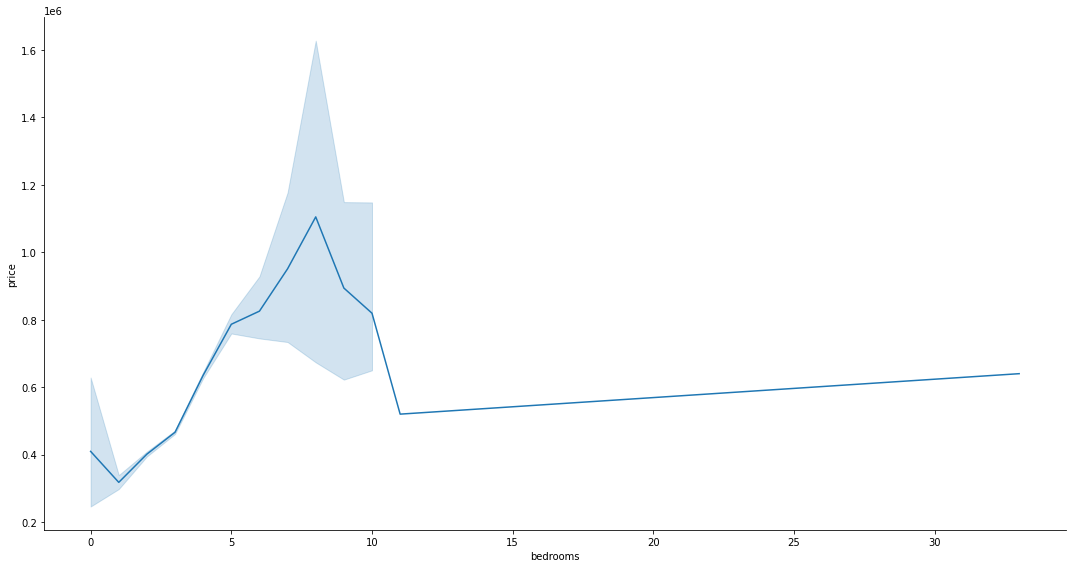

In [105]:
sns.relplot(x="bedrooms", y="price", data=df_house, kind="line", height=8, aspect=15/8)

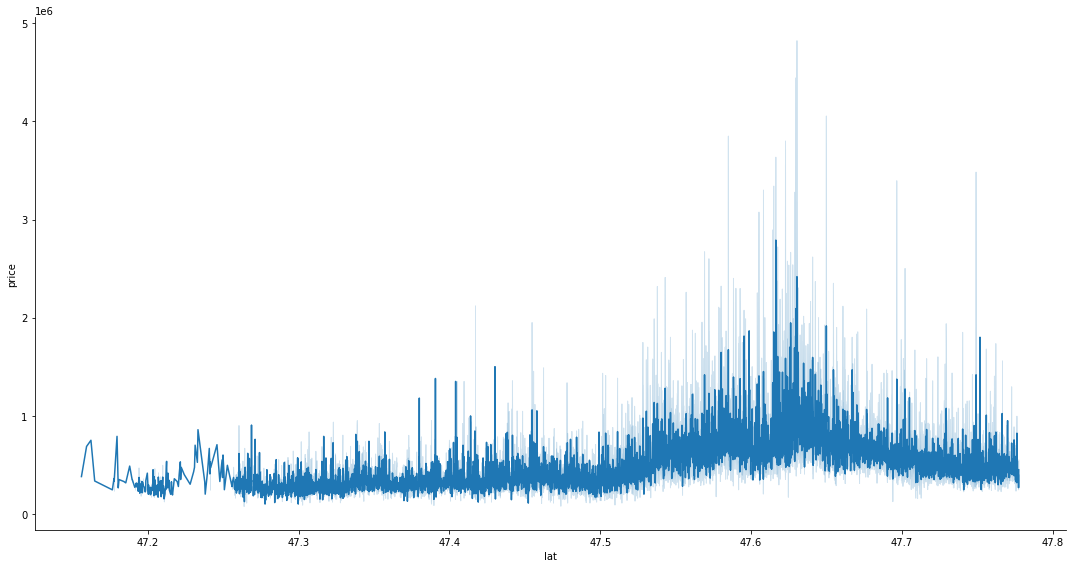

In [106]:
sns.relplot(x="lat", y="price", data=df_house, kind="line", height=8, aspect=15/8)

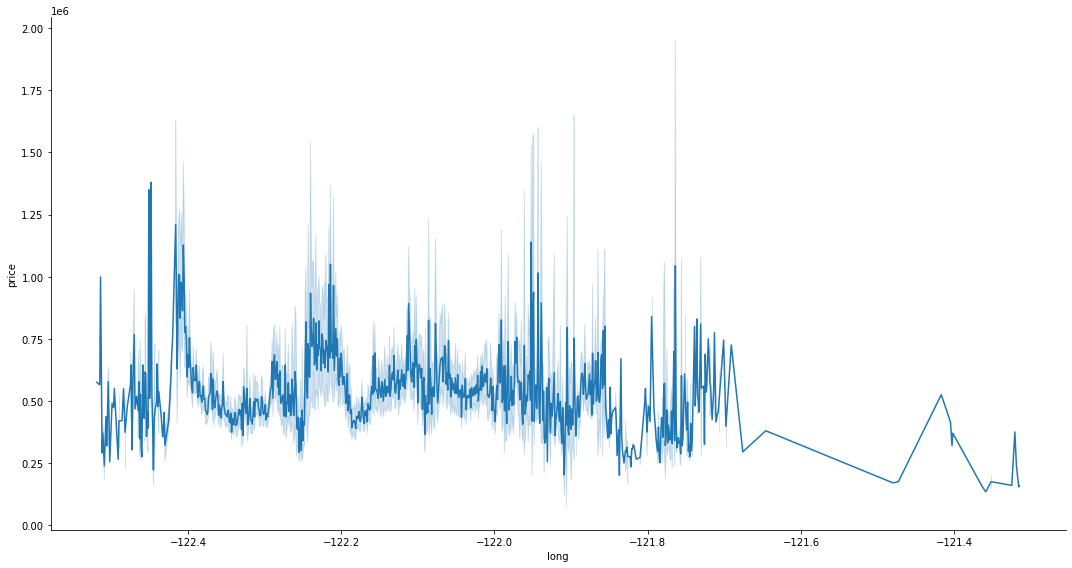

In [107]:
sns.relplot(x="long", y="price", data=df_house, kind="line", height=8, aspect=15/8)

In [108]:
import plotly.graph_objects as go

import pandas as pd

df = df_house

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
    lat = df['lat'],
    lon = df['long'],
    text = df['price'].astype(str) + ' dollars',
    marker = dict(
        color = df['price'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='house',
)
fig.show()

In [111]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import descartes
# import geopandas as gpd
# from shapely.geometry import Point, Polygon

# %matplotlib inline

# à tester

In [202]:
import plotly.express as px

px.scatter_mapbox(df_house, lat=df_house["lat"], lon=df_house["long"], mapbox_style="open-street-map", color=df_house["price"], width=1200, height=1200)

In [112]:
df_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

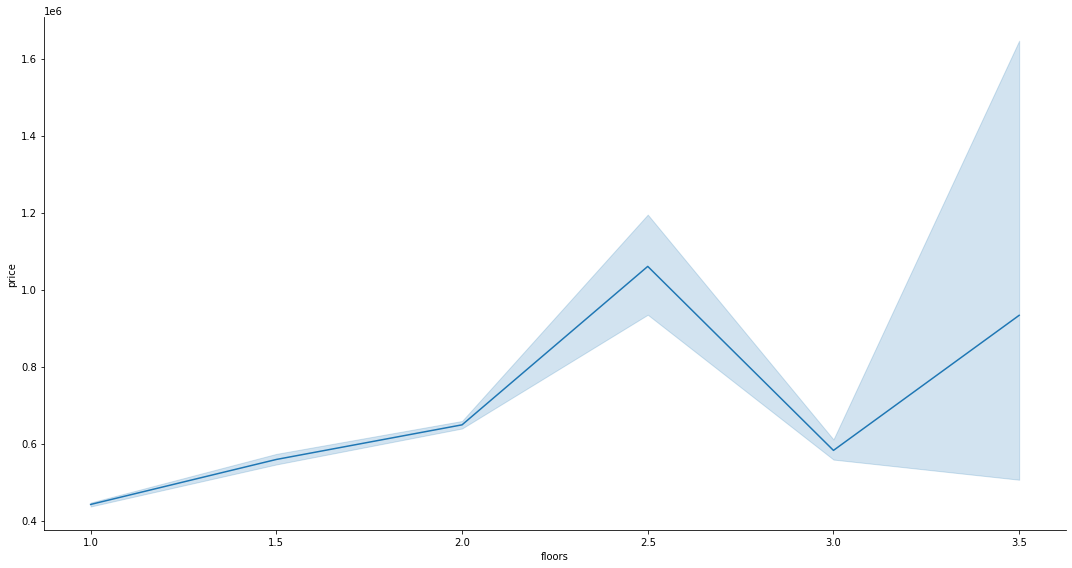

In [113]:
sns.relplot(x="floors", y="price", data=df_house, kind="line", height=8, aspect=15/8)

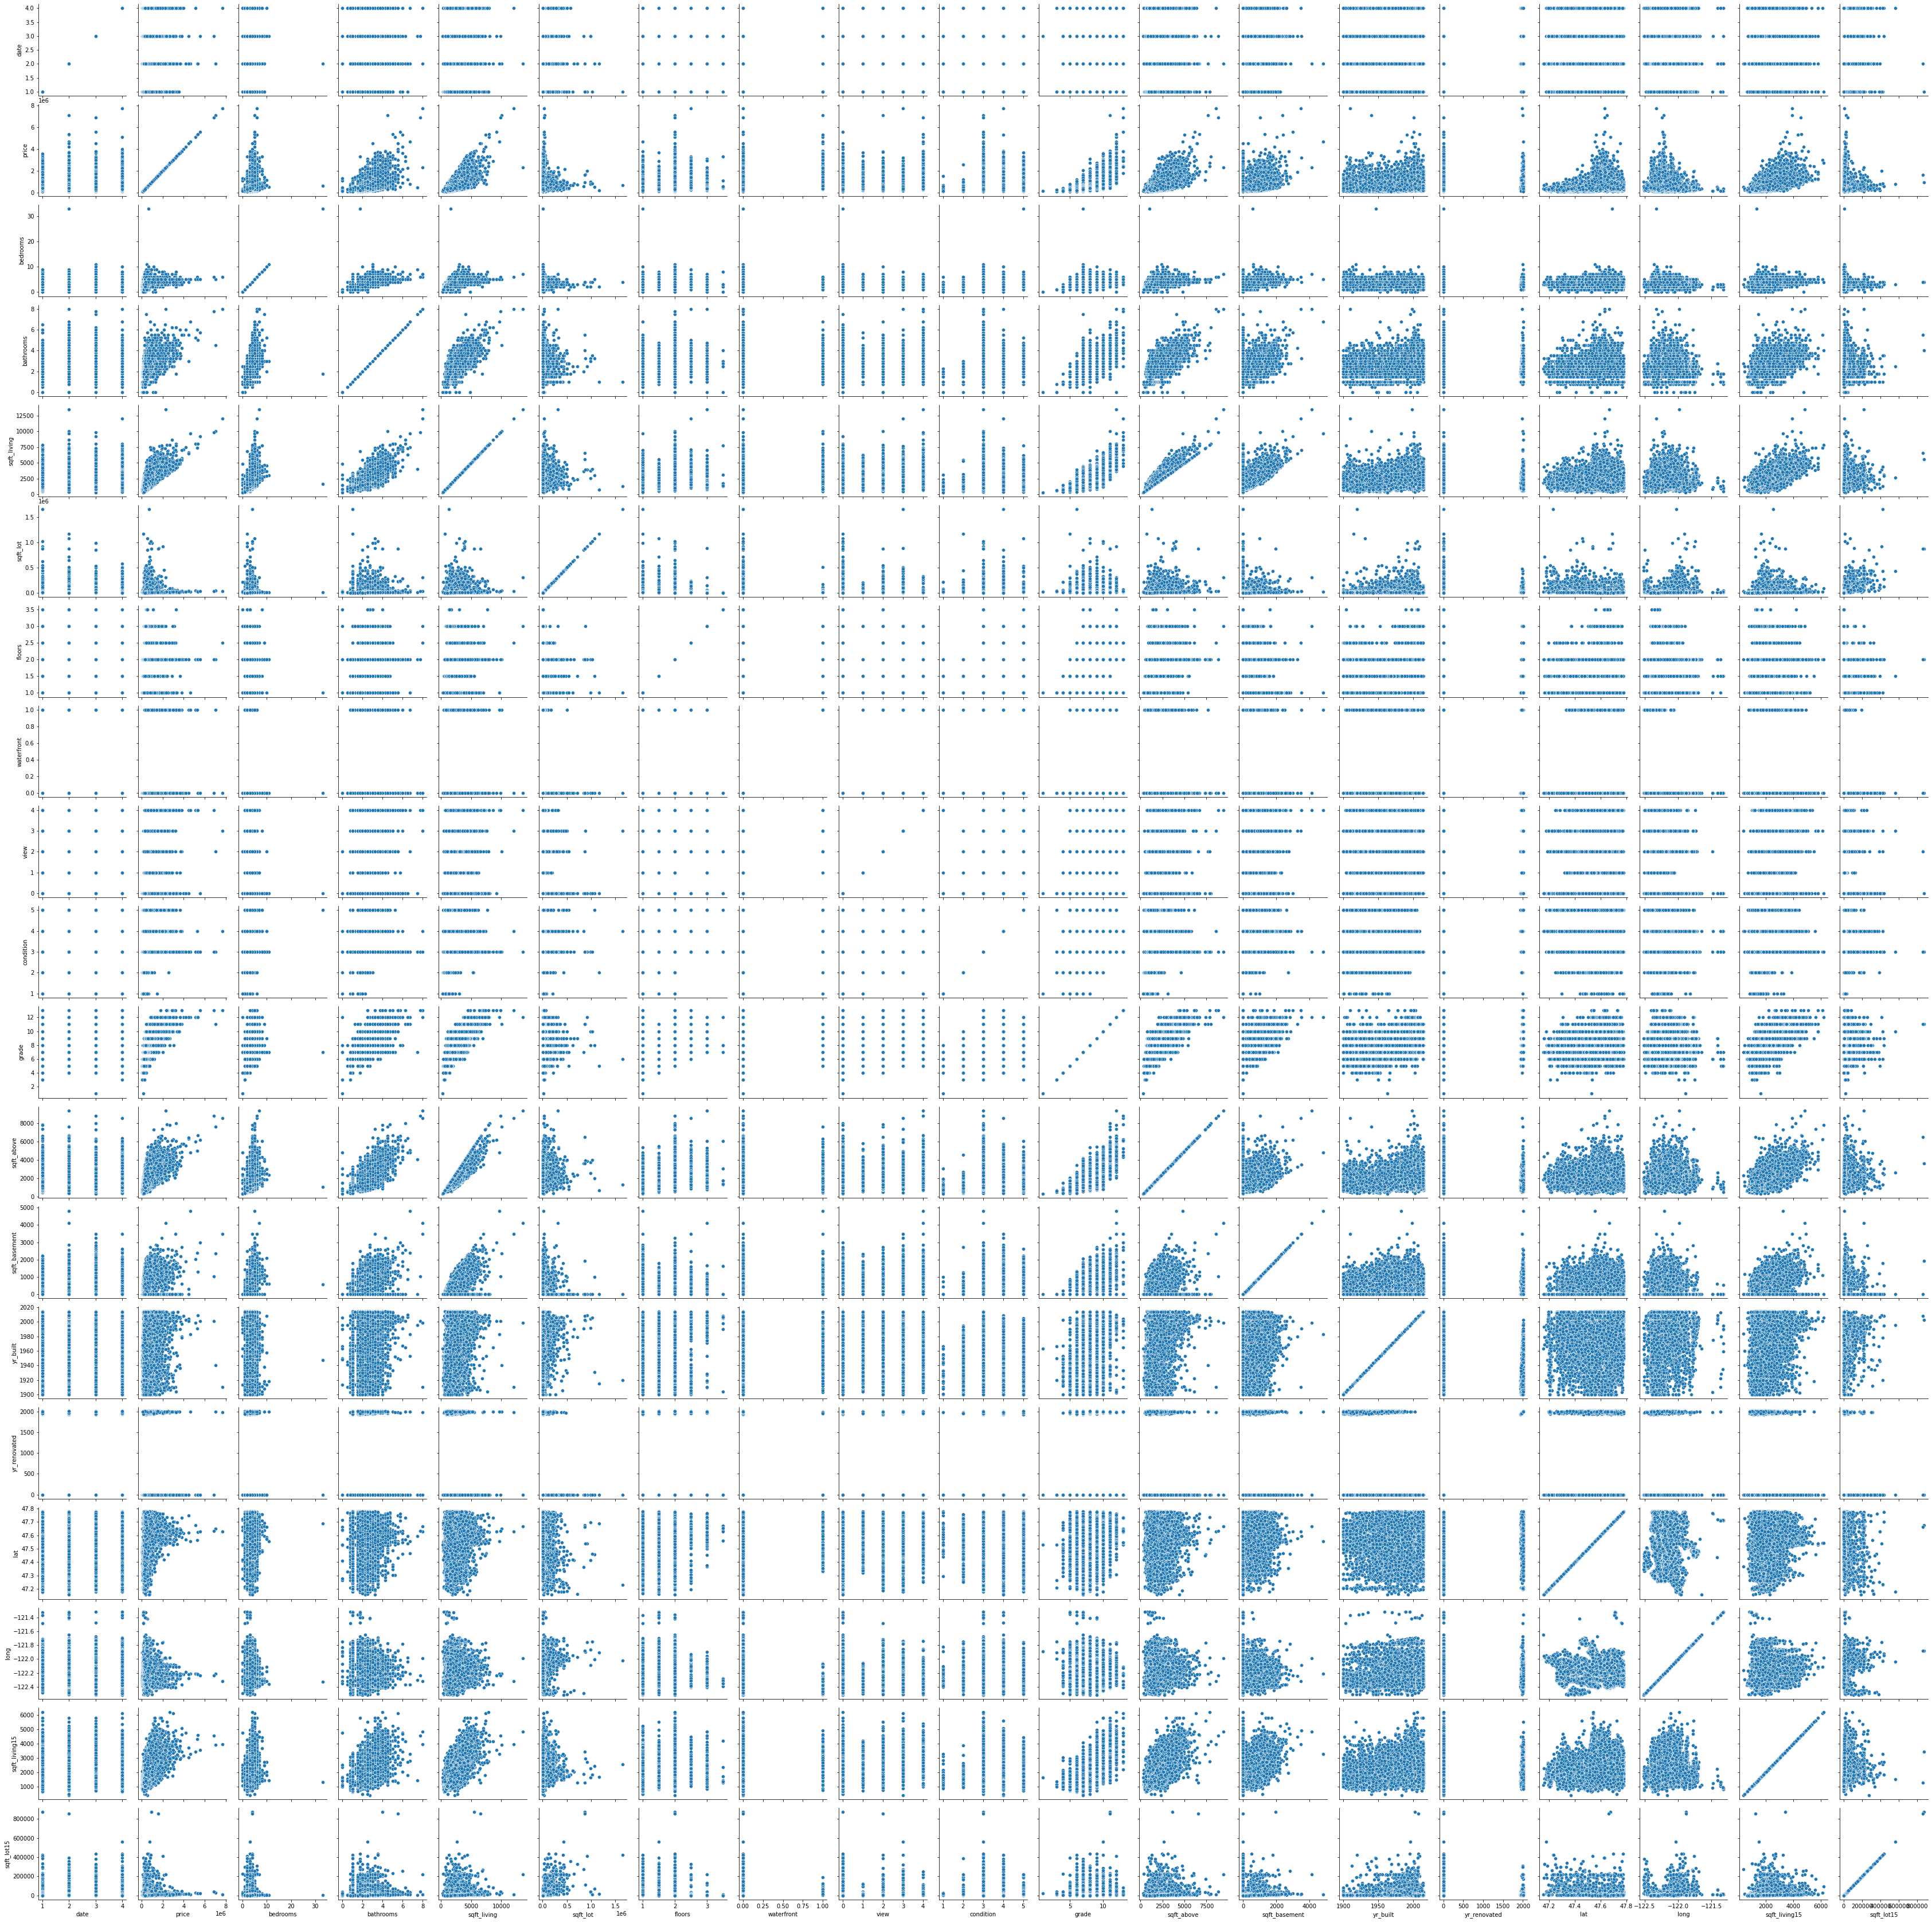

In [114]:
a = sns.PairGrid(df_house)
a.map(sns.scatterplot)

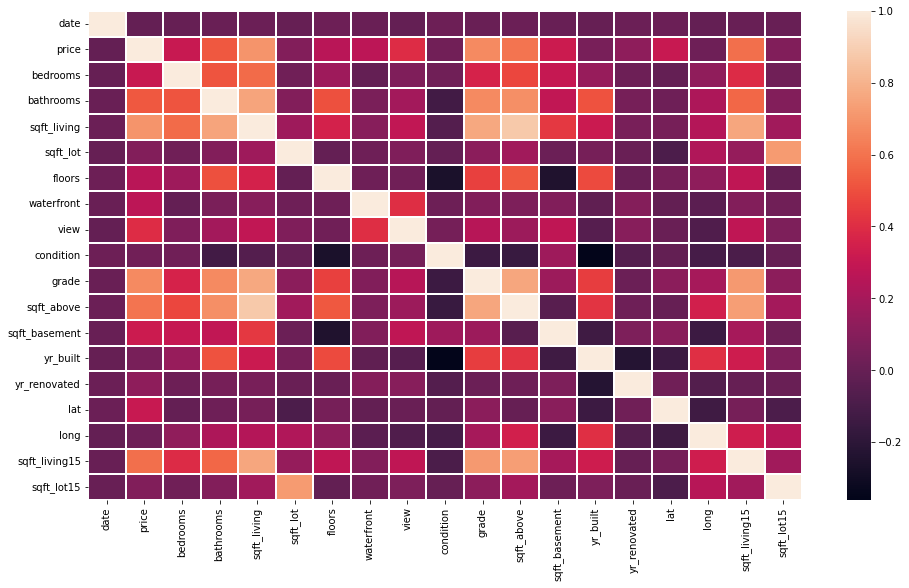

In [115]:
fig, ax = plt.subplots(figsize=(16,9))   
ax = sns.heatmap(df_house.corr(), linewidths=0.1)

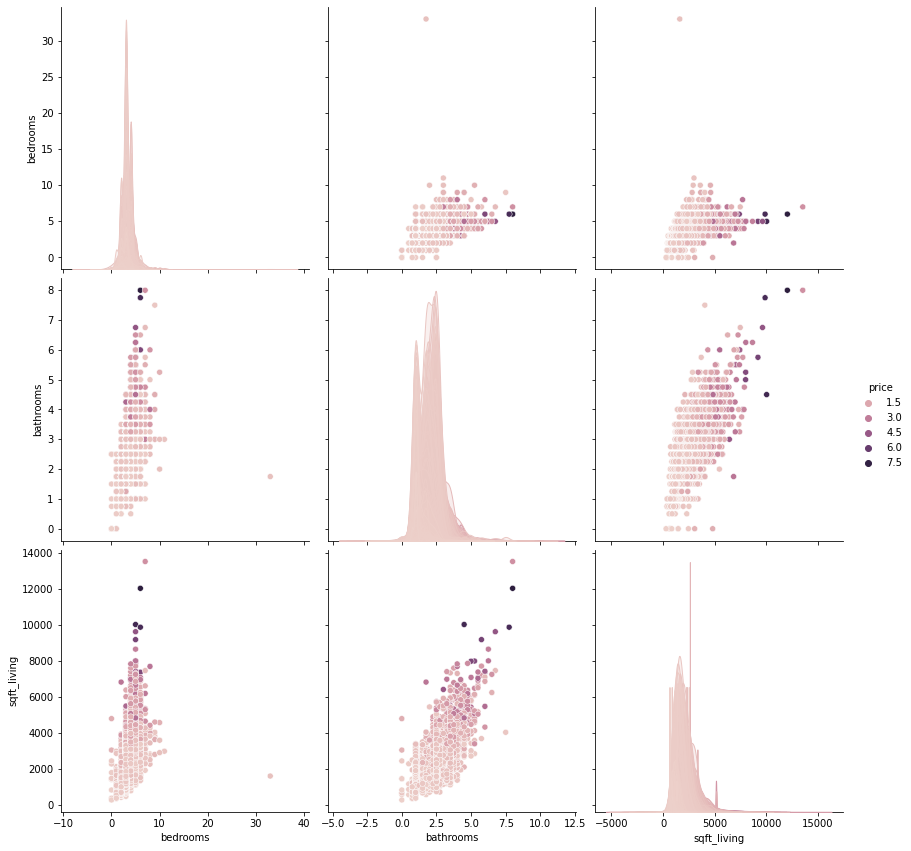

In [116]:
sns.pairplot(df_house[["bedrooms", "bathrooms", "sqft_living", "price"]], hue="price", height=4)

# Analyse des variables catégorielles

## zipcode

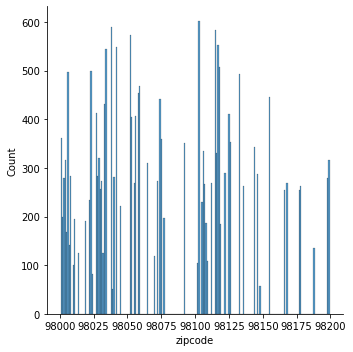

In [117]:
sns.displot(df_house["zipcode"])

<AxesSubplot:xlabel='zipcode', ylabel='price'>

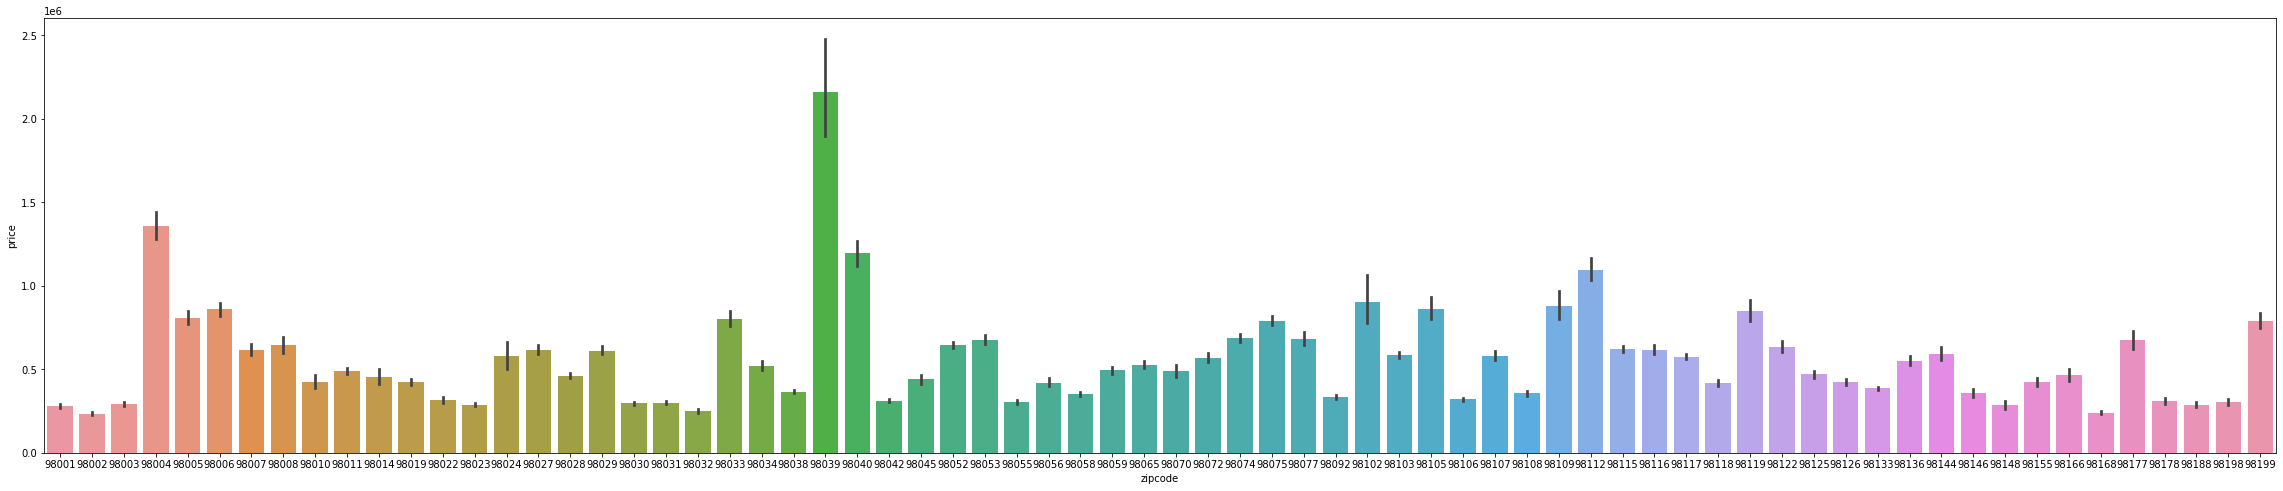

In [118]:
plt.figure(figsize = (40,8))
sns.barplot(x="zipcode", y="price", data=df_house)

## date

In [119]:
df_house["date"].value_counts()

2    6825
3    5925
4    4760
1    4103
Name: date, dtype: int64

<AxesSubplot:xlabel='date', ylabel='price'>

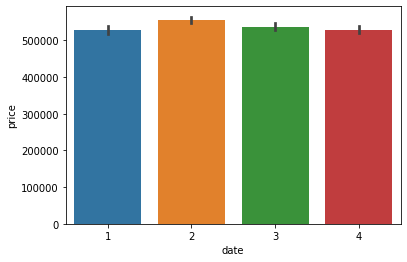

In [120]:
sns.barplot(x="date", y="price", data=df_house)

## waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

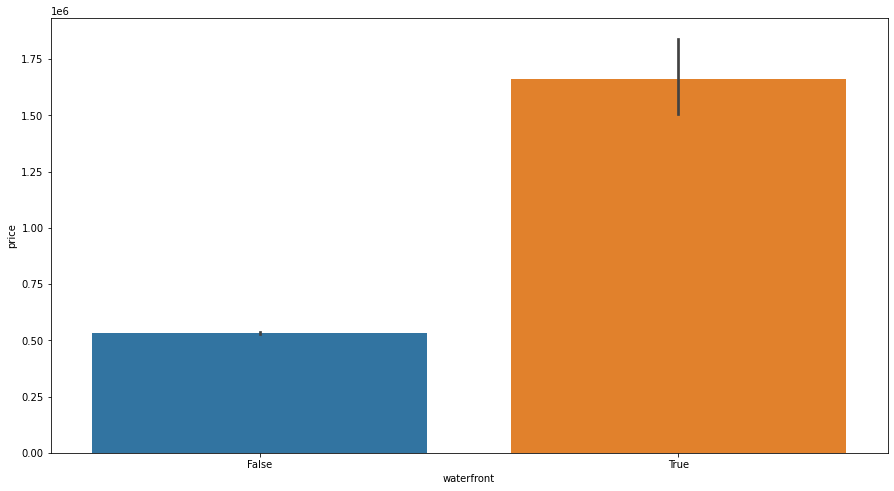

In [121]:
plt.figure(figsize = (15,8))
sns.barplot(x="waterfront", y="price", data=df_house)

## view

<AxesSubplot:xlabel='view', ylabel='price'>

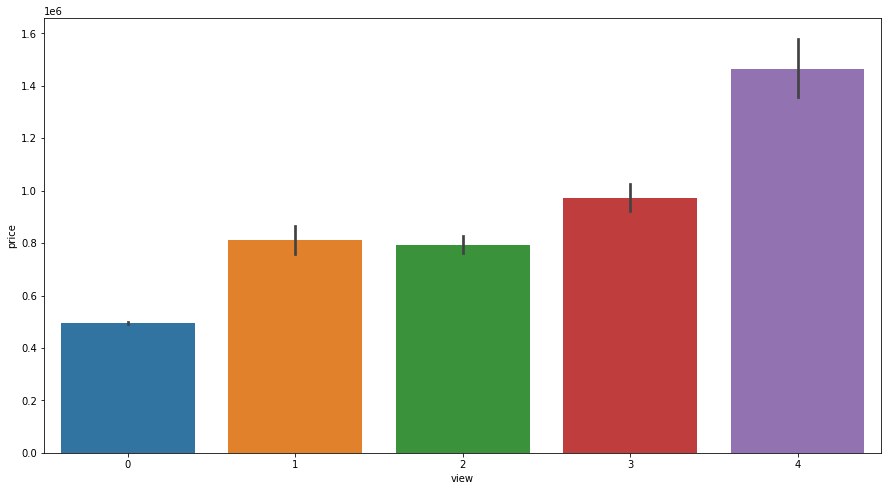

In [122]:
plt.figure(figsize = (15,8))
sns.barplot(x="view", y="price", data=df_house)

## condition

<AxesSubplot:xlabel='condition', ylabel='price'>

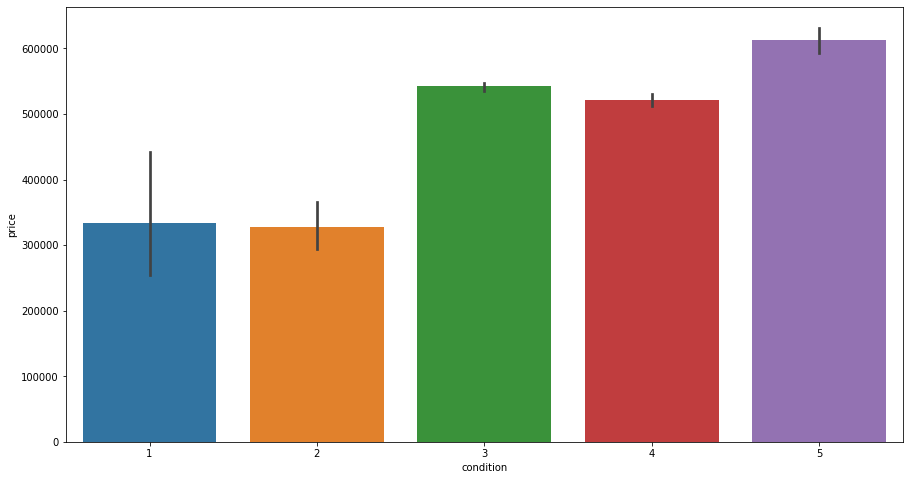

In [123]:
plt.figure(figsize = (15,8))
sns.barplot(x="condition", y="price", data=df_house)

## grade

<AxesSubplot:xlabel='grade', ylabel='price'>

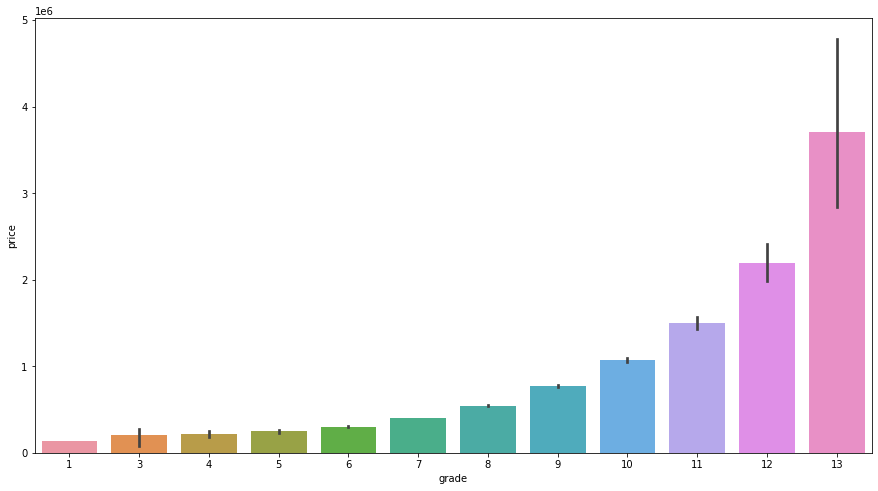

In [124]:
plt.figure(figsize = (15,8))
sns.barplot(x="grade", y="price", data=df_house)

# Analyse du prix par rapport à chaque variable 

In [125]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           21613 non-null  int64   
 1   price          21613 non-null  float64 
 2   bedrooms       21613 non-null  int64   
 3   bathrooms      21613 non-null  float64 
 4   sqft_living    21613 non-null  int64   
 5   sqft_lot       21613 non-null  int64   
 6   floors         21613 non-null  float64 
 7   waterfront     21613 non-null  bool    
 8   view           21613 non-null  int64   
 9   condition      21613 non-null  int64   
 10  grade          21613 non-null  int64   
 11  sqft_above     21613 non-null  int64   
 12  sqft_basement  21613 non-null  int64   
 13  yr_built       21613 non-null  int64   
 14  yr_renovated   21613 non-null  int64   
 15  zipcode        21613 non-null  category
 16  lat            21613 non-null  float64 
 17  long           21613 non-null  

## bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

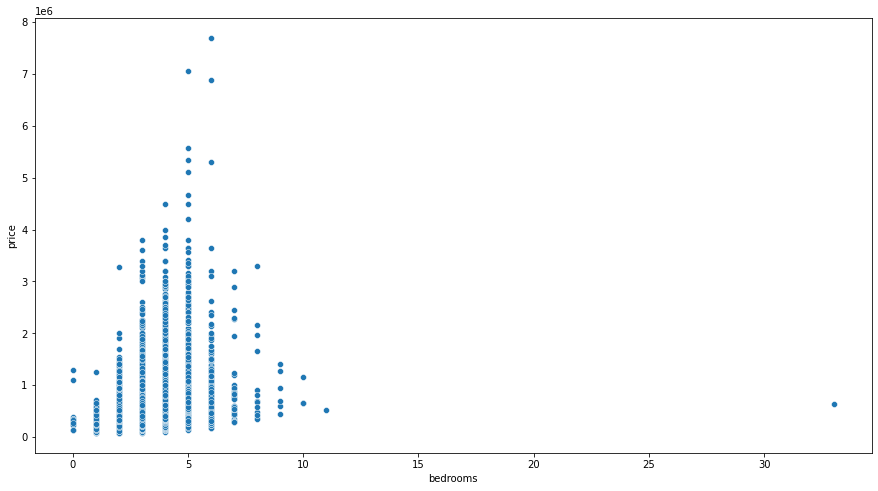

In [126]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="bedrooms", y="price", data=df_house)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

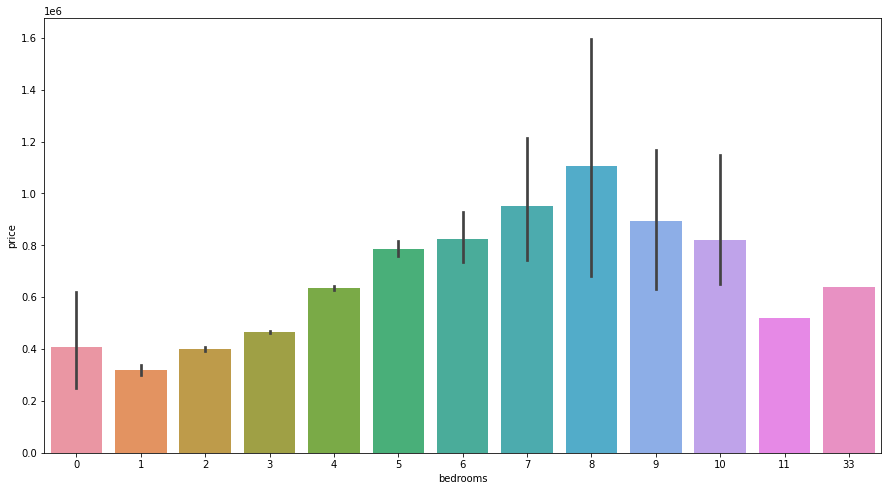

In [127]:
plt.figure(figsize = (15,8))
sns.barplot(x="bedrooms", y="price", data=df_house)

## bathrooms

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

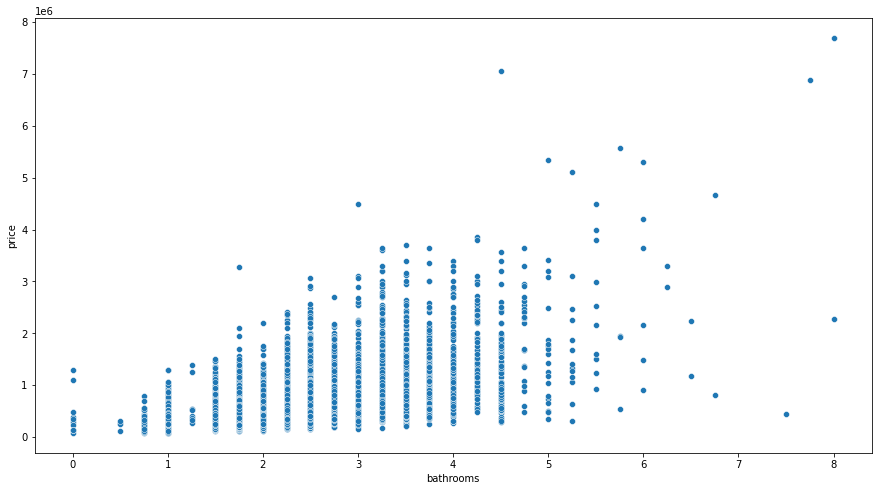

In [128]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="bathrooms", y="price", data=df_house)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

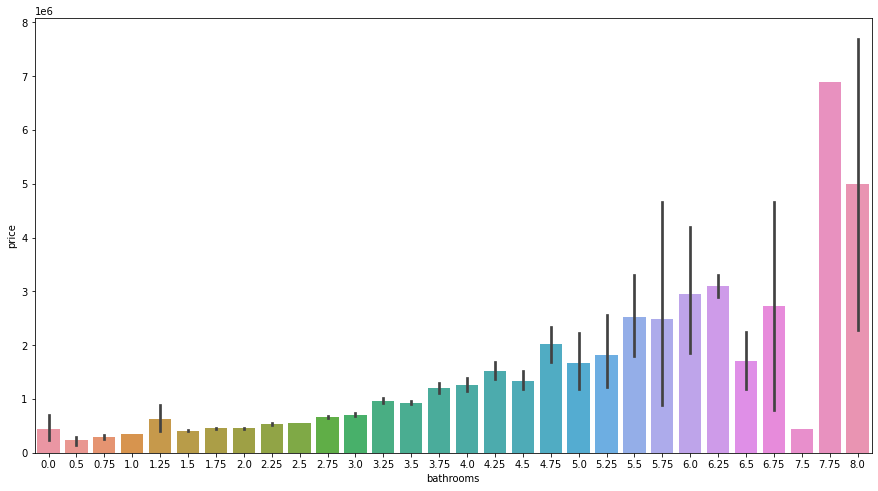

In [129]:
plt.figure(figsize = (15,8))
sns.barplot(x="bathrooms", y="price", data=df_house)

## sqft_living

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

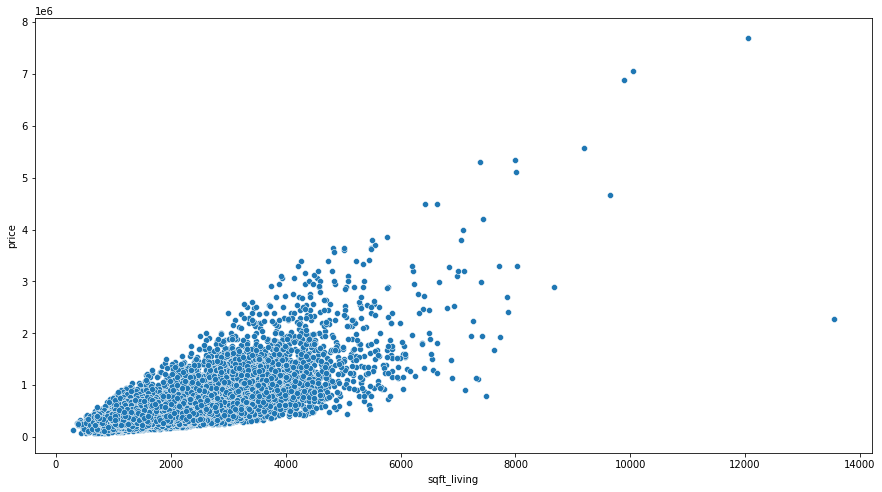

In [130]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sqft_living", y="price", data=df_house)

## sqft_lot

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

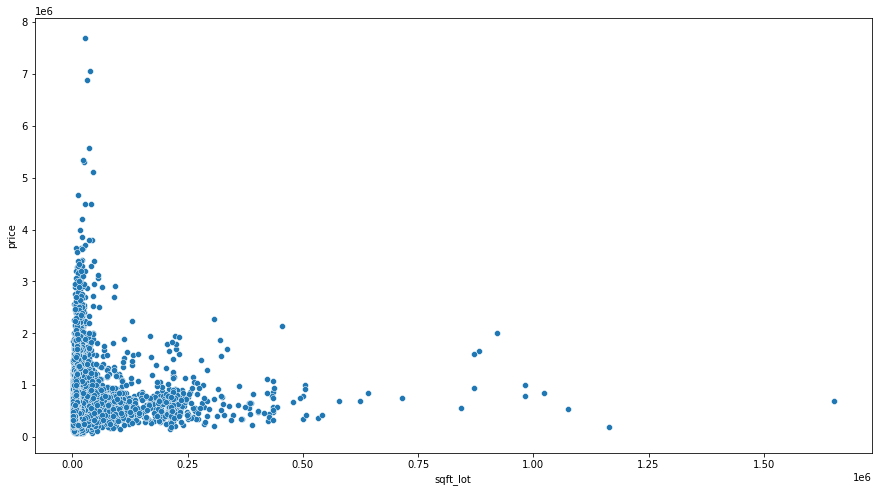

In [131]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sqft_lot", y="price", data=df_house)

## floors

<AxesSubplot:xlabel='floors', ylabel='price'>

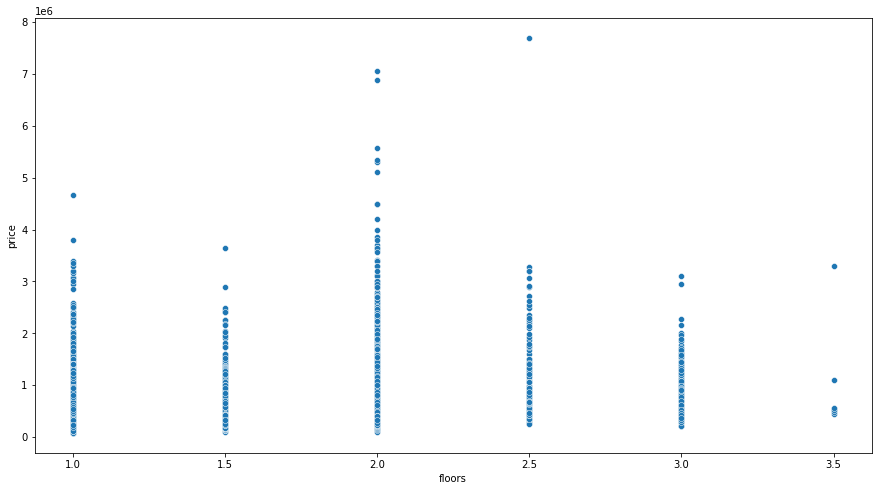

In [132]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="floors", y="price", data=df_house)

<AxesSubplot:xlabel='floors', ylabel='price'>

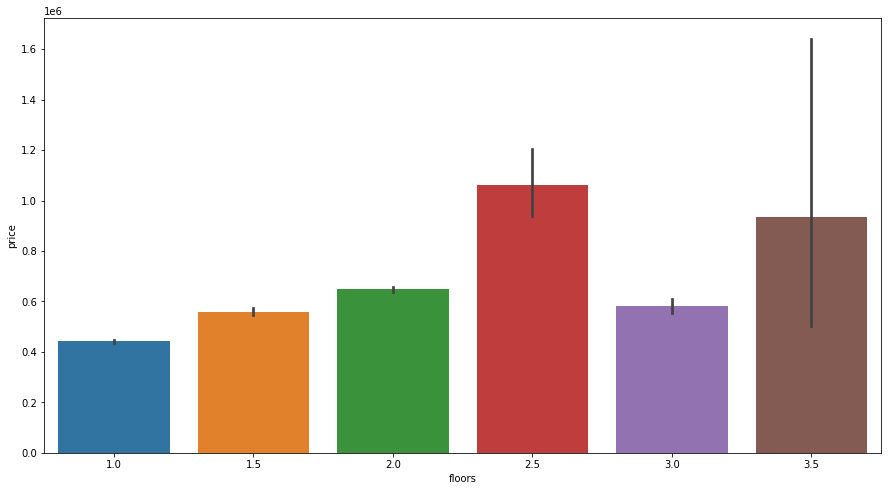

In [133]:
plt.figure(figsize = (15,8))
sns.barplot(x="floors", y="price", data=df_house)

## sqft_above

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

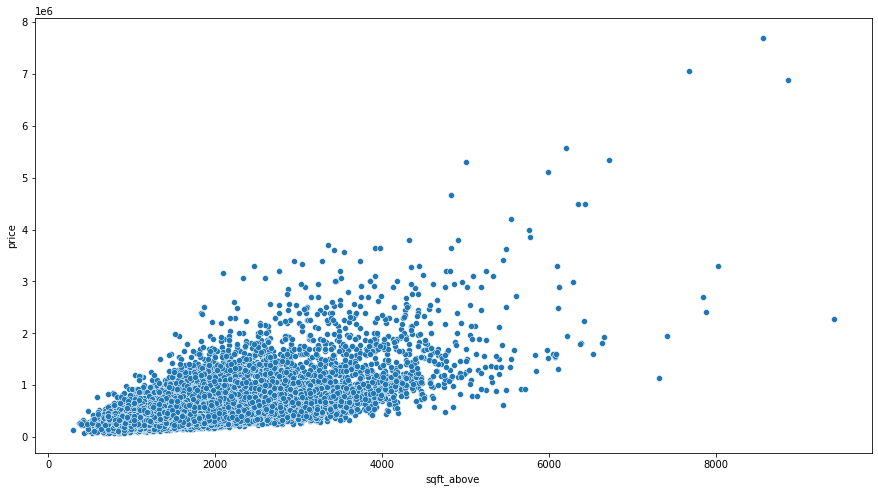

In [134]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sqft_above", y="price", data=df_house)

## sqft_basement

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

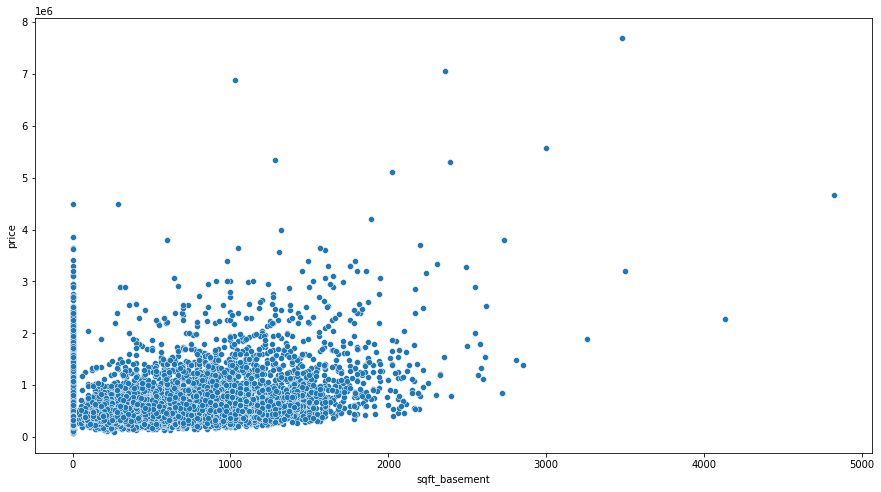

In [135]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sqft_basement", y="price", data=df_house)

## yr_built

<AxesSubplot:xlabel='yr_built', ylabel='price'>

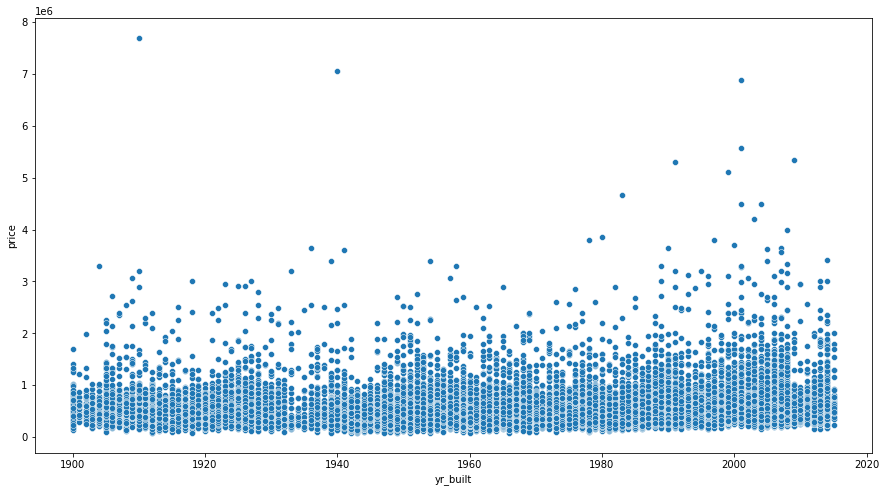

In [136]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="yr_built", y="price", data=df_house)
# sns.barplot(x="yr_built", y="price", data=df_house)

## yr_renovated

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

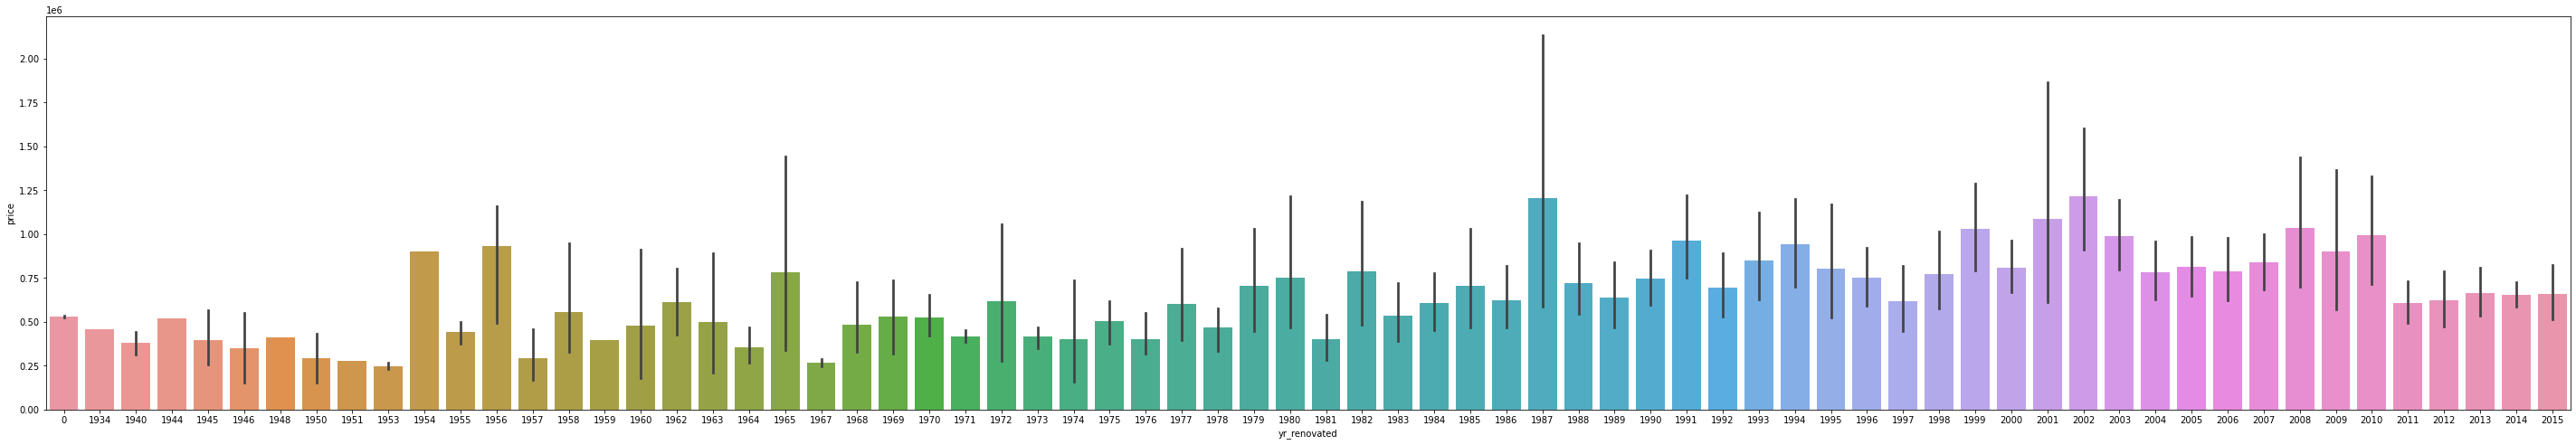

In [137]:
plt.figure(figsize = (50,8))
# sns.scatterplot(x="yr_renovated", y="price", data=df_house)
sns.barplot(x="yr_renovated", y="price", data=df_house)

## sqft_living15  

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

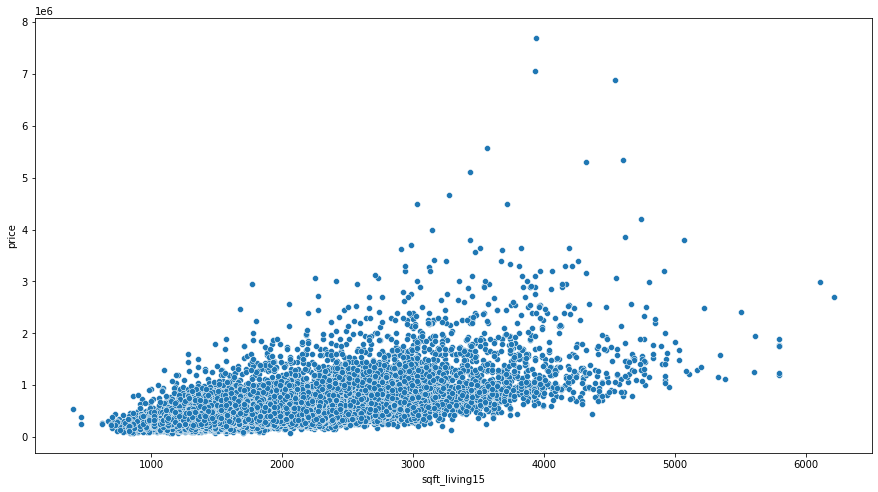

In [138]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sqft_living15", y="price", data=df_house)

## sqft_lot15  

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

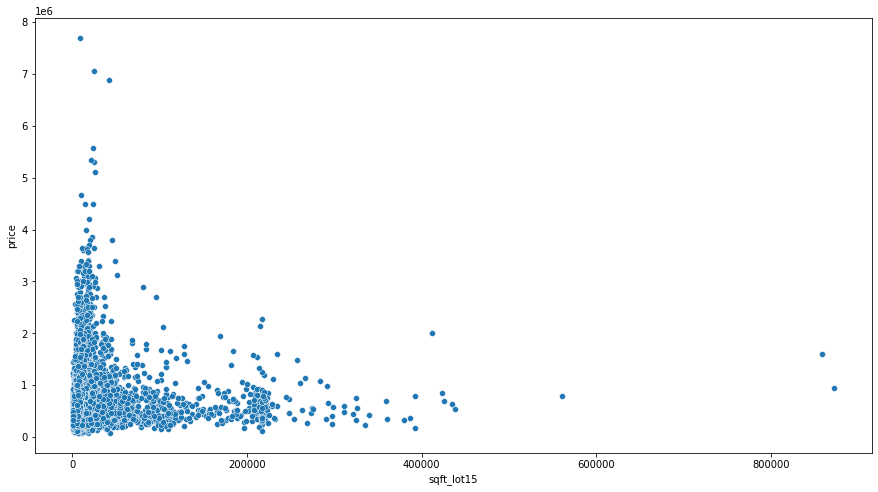

In [139]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sqft_lot15", y="price", data=df_house)

# Heatmap

C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_9896/3136212465.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Correlation Heatmap')

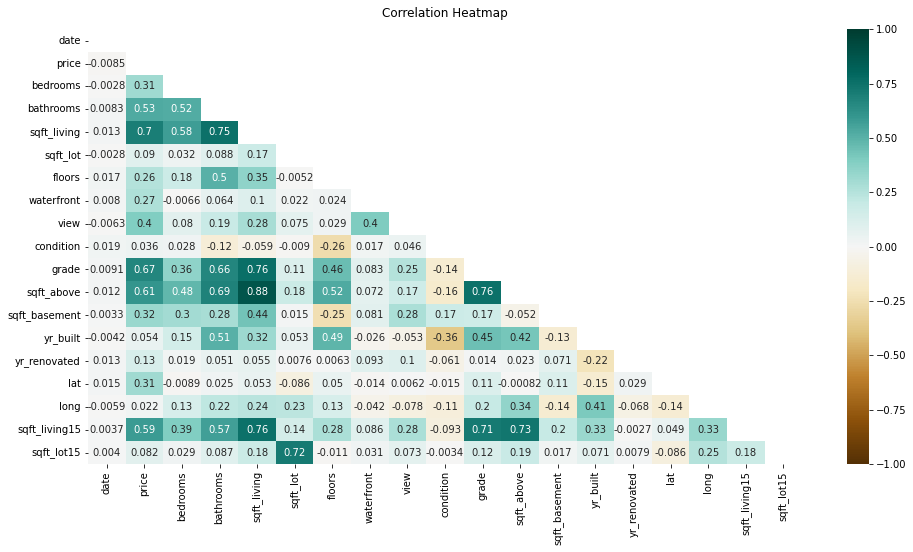

In [140]:
plt.figure(figsize=(16,8))
mask = np.triu(np.ones_like(df_house.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_house.corr(), mask=mask, vmin=-1, vmax=1,annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Features Correlating with Price')

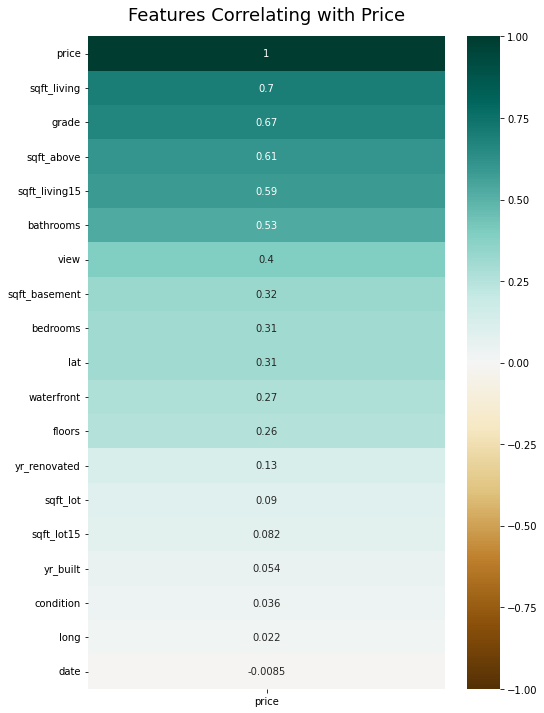

In [141]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_house.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16)

In [142]:
df_house[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]]

sqft_living  grade  sqft_above  sqft_living15  bathrooms
0             1180      7        1180           1340       1.00
1             2570      7        2170           1690       2.25
2              770      6         770           2720       1.00
3             1960      7        1050           1360       3.00
4             1680      8        1680           1800       2.00
...            ...    ...         ...            ...        ...
21608         1530      8        1530           1530       2.50
21609         2310      8        2310           1830       2.50
21610         1020      7        1020           1020       0.75
21611         1600      8        1600           1410       2.50
21612         1020      7        1020           1020       0.75

[21613 rows x 5 columns]

# Model

## Simple linear regression

Coefficients: 
 [273.82181112]
Intercept: 
 -30186.361061054515
Mean squared error: 85730574276.16
Coefficient of determination: 0.50


InvalidIndexError: (slice(None, None, None), None)

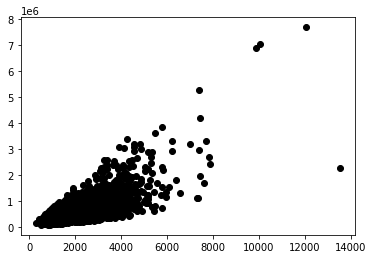

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, recall_score,precision_score, roc_auc_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


y = df_house["price"]
# X = df_house[["sqft_living","grade","sqft_above", "sqft_living15", "bathrooms"]]
X = df_house[["sqft_living"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Create linear regression object
regr = linear_model.LinearRegression()
# model = make_pipeline(StandardScaler(with_mean=False), linear_model.LinearRegression())

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The intercept
print("Intercept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

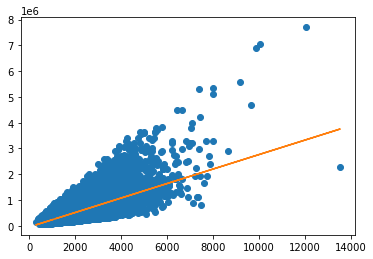

In [ ]:
x = df_house["sqft_living"]
y = df_house["price"]

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

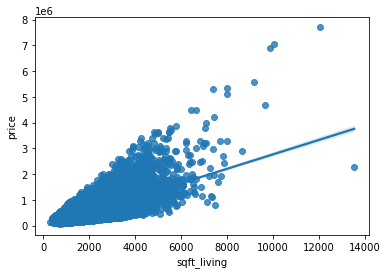

In [ ]:
sns.regplot(x="sqft_living", y="price", data=df_house)

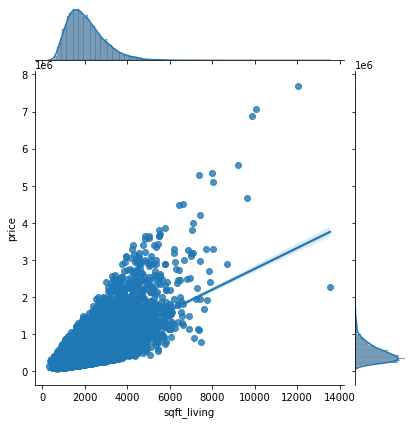

In [ ]:
sns.jointplot(x="sqft_living", y="price", data=df_house, kind="reg")

## Multiple linear regression

### LinearRegression

In [145]:
# X = df_house[["sqft_living","grade","sqft_above", "sqft_living15", "bathrooms"]]
X = df_house.drop(["price"], axis=1)
y = df_house["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

coeff_df = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
display(coeff_df)

y_pred = regr.predict(X_test)

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df_compare)

print("Coefficient of determination: %.5f" % r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient
date            -8004.996732
bedrooms       -32173.708422
bathrooms       35973.237523
sqft_living       106.540241
sqft_lot            0.129571
floors          10571.328857
waterfront     539520.914382
view            51806.131866
condition       27954.274354
grade           95622.099651
sqft_above         68.684892
sqft_basement      37.855349
yr_built        -2521.318156
yr_renovated       21.244680
zipcode          -551.104887
lat            611336.741838
long          -206684.747456
sqft_living15      21.065186
sqft_lot15         -0.341419

Actual     Predicted
15544   459000.0  6.280511e+05
17454   445000.0  4.807969e+05
21548  1057000.0  7.042587e+05
3427    732350.0  7.021488e+05
8809    235000.0  2.366765e+05
...          ...           ...
13597   965000.0  1.045774e+06
9648    359950.0  3.776310e+05
18627   260000.0  3.567319e+05
9553   1795000.0  1.392469e+06
14200   418000.0  3.558777e+05

[4323 rows x 2 columns]

Coefficient of determination: 0.68662
Mean Absolute Error: 129281.88824867684
Mean Squared Error: 54089145892.01751
Root Mean Squared Error: 232570.73309429438


In [ ]:
df_compare["diff"] = (round(df_compare["Actual"] - df_compare["Predicted"])).astype(int)
df_compare

Actual     Predicted    diff
15544   459000.0  6.280511e+05 -169051
17454   445000.0  4.807969e+05  -35797
21548  1057000.0  7.042587e+05  352741
3427    732350.0  7.021488e+05   30201
8809    235000.0  2.366765e+05   -1677
...          ...           ...     ...
13597   965000.0  1.045774e+06  -80774
9648    359950.0  3.776310e+05  -17681
18627   260000.0  3.567319e+05  -96732
9553   1795000.0  1.392469e+06  402531
14200   418000.0  3.558777e+05   62122

[4323 rows x 3 columns]

#### With Pipeline

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

numeric_features = df_house.drop([ "price"], axis=1).columns
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

categorical_features = ['zipcode']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])



X = df_house.drop(["price"], axis=1)
y = df_house["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))
print("R² = ", r2_score(y_test,y_pred))

Train accuracy : 0.8842825842666565
Test accuracy : 0.889055283652325
R² =  0.889055283652325


In [147]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare["diff"] = (round(df_compare["Actual"] - df_compare["Predicted"])).astype(int)

display(df_compare)

Actual   Predicted    diff
15544   459000.0   471710.75  -12711
17454   445000.0   412766.75   32233
21548  1057000.0   626942.75  430057
3427    732350.0   628446.75  103903
8809    235000.0   282142.75  -47143
...          ...         ...     ...
13597   965000.0   939038.75   25961
9648    359950.0   338174.75   21775
18627   260000.0   182038.75   77961
9553   1795000.0  1805598.75  -10599
14200   418000.0   317654.75  100345

[4323 rows x 3 columns]

#### With GridSearchCV

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

X = df_house.drop(["price"], axis=1)
# X = df_house[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]]
y = df_house["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

numeric_features = X.drop(["zipcode", "date", "grade", "condition", "view", "waterfront"], axis=1).columns # .drop(["zipcode", "date", "grade", "condition", "view", "waterfront"], axis=1)
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

categorical_features = ['zipcode'] # ["zipcode", "date", "grade", "condition", "view", "waterfront"]
categorical_transformer = Pipeline(steps=[ 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) #tocomment

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features) #tocomment
        ])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

parameters = {
                  "classifier__fit_intercept" : [True, False],
                  "classifier__normalize" : [True, False], 
                  "classifier__copy_X" : [True, False],
                  }

clf = GridSearchCV(pipe, parameters, scoring='r2', verbose=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))
print("R² = ", r2_score(y_test,y_pred))

print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

warnings.filterwarnings("default")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True, score=0.808, total=   0.4s
[CV] classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True, score=0.788, total=   0.4s
[CV] classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True, score=0.823, total=   0.4s
[CV] classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True 
[CV]  classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True, score=0.808, total=   0.4s
[CV] classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True 
[CV]  classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=True, score=0.791, total=   0.4s
[CV] classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=False 
[CV]  classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=False, score=0.805, total=   0.3s
[CV] classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=False 
[CV]  classifier__copy_X=True, classifier__fit_intercept=True, classifier__normalize=False, score=0.788, total=   0.4s
[CV] classifier__copy_X=True, classifier__fit_

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.8s finished


Train accuracy : 0.8192924354016947
Test accuracy : 0.8148799131715716
R² =  0.8148799131715716
Best parameter (CV score=0.804):
{'classifier__copy_X': True, 'classifier__fit_intercept': True, 'classifier__normalize': True}


In [153]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [171]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")

numeric_features = df_house.drop([ "price"], axis=1).columns
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

categorical_features = ['zipcode']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression(copy_X= True, fit_intercept= True, normalize= True))])



X = df_house.drop(["price"], axis=1)
y = df_house["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))
print("R² = ", r2_score(y_test,y_pred))

coeff_df = pd.DataFrame(clf.named_steps["classifier"].coef_, columns=['Coefficient'])
display(coeff_df)

warnings.filterwarnings("default")

Train accuracy : 0.8844155329558422
Test accuracy : 0.8889495346301981
R² =  0.8889495346301981


Coefficient
0   -4.221459e+14
1   -3.709290e+06
2    8.275507e+06
3   -1.912409e+06
4   -2.077201e+16
..            ...
275 -3.751860e+15
276 -3.809565e+15
277 -4.386525e+15
278 -4.963309e+15
279 -5.020978e+15

[280 rows x 1 columns]

In [170]:
# preprocessor.transform(X_train)

In [ ]:
pd.DataFrame(preprocessor.transform(X_train))

0         1         2         3         4         5         6    \
0      0.0  1.423818 -0.392335 -0.472433  0.127706 -0.191227 -0.913657   
1      0.0 -1.477743 -0.392335  0.507536  0.326877 -0.195453  0.937642   
2      0.0 -0.510556 -1.462960 -1.452402 -0.934540 -0.266433 -0.913657   
3      0.0  1.423818  0.678289  0.180880  0.481788 -0.122534 -0.913657   
4      0.0  0.456631 -0.392335 -1.452402 -1.011996 -0.180253 -0.913657   
...    ...       ...       ...       ...       ...       ...       ...   
17285  0.0  0.456631 -0.392335  0.507536 -0.171051 -0.264869  0.937642   
17286  0.0 -1.477743  0.678289  3.120786  1.488709 -0.181444  2.788941   
17287  0.0 -0.510556 -0.392335 -0.472433 -0.115725  0.916186 -0.913657   
17288  0.0  0.456631 -0.392335  0.180880 -0.104660 -0.150273 -0.913657   
17289  0.0 -0.510556  1.748914  2.467473  1.864921  0.299543  0.937642   

            7         8         9         10        11        12        13   \
0     -0.088378  2.311659  0.904785 -0.559432 -0.480962  1.152282 -0.608981   
1     -0.088378 -0.306571 -0.630570  1.146039  0.718928 -0.661494  0.546768   
2     -0.088378 -0.306571 -0.630570 -0.559432 -0.676863 -0.661494 -1.458797   
3     -0.088378 -0.306571  0.904785  1.146039  0.510784  0.041344 -0.133084   
4     -0.088378 -0.306571  0.904785 -1.412168 -0.762569 -0.661494 -1.832716   
...         ...       ...       ...       ...       ...       ...       ...   
17285 -0.088378 -0.306571 -0.630570  0.293304  0.167958 -0.661494  1.158635   
17286 -0.088378 -0.306571 -0.630570  1.146039  2.004524 -0.661494  1.464569   
17287 -0.088378 -0.306571 -0.630570  0.293304 -0.260574  0.245394  0.308820   
17288 -0.088378 -0.306571 -0.630570 -0.559432 -0.603400  0.902888 -0.405025   
17289 -0.088378 -0.306571 -0.630570  1.998775  2.420813 -0.661494  0.410798   

            14        15        16        17        18        19        20   \
0     -0.210401  1.866057 -0.406252 -0.126855  0.287368 -0.203232  1.602581   
1     -0.210401  0.764447  0.653083 -1.079007 -0.578250 -0.302589 -1.211982   
2     -0.210401  0.689761  0.864950 -0.553192 -0.548907 -0.324228 -0.649070   
3     -0.210401 -1.364088  0.271146  0.263954  1.651817 -0.101963  1.602581   
4     -0.210401  1.847385  1.028534 -1.029268 -0.270148 -0.379515  0.289118   
...         ...       ...       ...       ...       ...       ...       ...   
17285 -0.210401 -0.915975 -0.042331  1.564281  0.302040 -0.322749  0.289118   
17286 -0.210401  0.465705  0.921159 -0.823205 -0.915694 -0.260033 -1.211982   
17287 -0.210401 -0.057093  0.244482  1.436380  0.698170  0.861464 -0.649070   
17288 -0.210401  1.847385  1.553877 -1.029268 -0.636935 -0.128037  0.289118   
17289 -0.210401 -0.841290  0.642994  0.221320  2.121304  0.804446 -0.649070   

            21        22        23        24        25        26        27   \
0      0.815595  0.550691  1.071540 -0.093577  0.100262 -0.081748  3.554902   
1     -1.284356 -0.943338 -0.880490 -0.286577 -0.830743 -0.081748 -0.280860   
2     -1.051028 -1.109341 -0.852997 -0.279672 -0.830743 -0.081748 -0.280860   
3      1.748907  1.214703  1.462556  0.013334  0.100262 -0.081748 -0.280860   
4      0.115611 -0.777335 -0.541405 -0.144552 -0.365241 -0.081748 -0.280860   
...         ...       ...       ...       ...       ...       ...       ...   
17285  0.115611  0.716694  0.155094 -0.243323  1.031267 -0.081748 -0.280860   
17286 -1.051028 -0.279325 -0.559734 -0.281126 -0.365241 -0.081748 -0.280860   
17287 -0.584372 -0.611331 -0.400883  0.640628 -0.830743 -0.081748 -0.280860   
17288  0.115611  0.467689  0.210080 -0.109557 -0.365241 -0.081748 -0.280860   
17289  0.348939  0.882697  0.692742  0.160764  0.100262 -0.081748 -0.280860   

            28        29        30        31        32        33        34   \
0      1.856429  1.012143  0.361739  1.982907  1.388336 -0.195525  1.427760   
1     -1.420231 -1.214925 -0.740494 -0.595662 -1.469222 -0.195525 -1.477341   
2     -0.664079 -0.628855 -0.70939

In [172]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare["diff"] = (round(df_compare["Actual"] - df_compare["Predicted"])).astype(int)
df_compare.sort_values(by='Actual')

Actual  Predicted     diff
2141     82500.0   184744.0  -102244
18468    83000.0   264292.0  -181292
13756    86500.0   132725.0   -46225
4563    100000.0   199255.0   -99255
11932   104950.0   225300.0  -120350
...          ...        ...      ...
12370  4208000.0  2602617.0  1605383
1315   5300000.0  4285113.0  1014887
9254   6885000.0  5247385.0  1637615
3914   7062500.0  5839449.0  1223051
7252   7700000.0  5657753.0  2042247

[4323 rows x 3 columns]

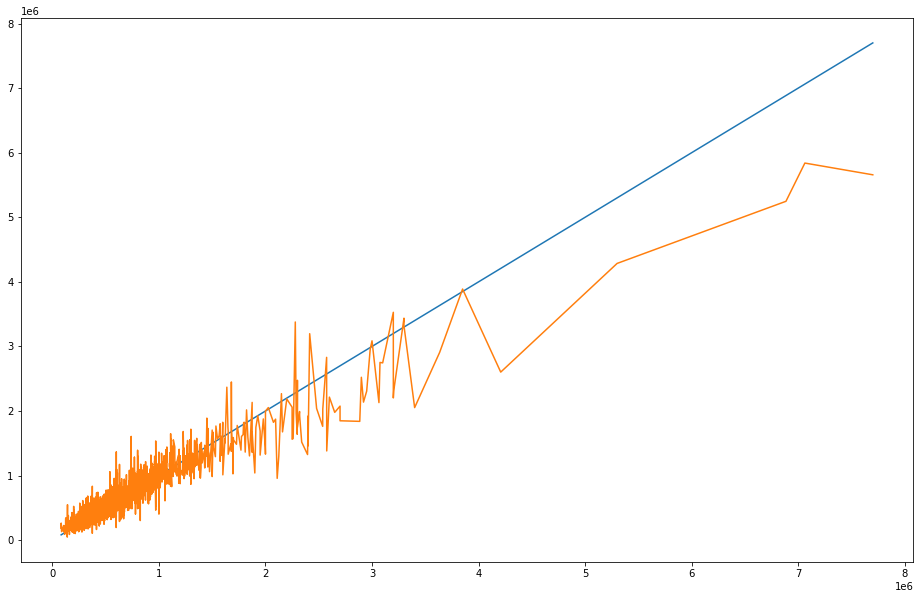

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.plot(df_compare.sort_values(by='Actual')['Actual'],df_compare.sort_values(by='Actual')['Actual'])
plt.plot(df_compare.sort_values(by='Actual')['Actual'],df_compare.sort_values(by='Actual')['Predicted'])
plt.show()

### Statsmodel

In [ ]:
import statsmodels.api as sm

In [189]:
df_stats = pd.get_dummies(df_house, columns=['zipcode', "waterfront"], drop_first=True)
# display(df_stats)

X = df_stats.drop(["price", "sqft_lot", "sqft_living15", "sqft_lot15", "lat", "long", "sqft_basement"], axis=1)
y = df_stats['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

X = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              3611.
Date:                Fri, 11 Mar 2022   Prob (F-statistic):                        0.00
Time:                        12:05:55   Log-Likelihood:                     -2.3081e+05
No. Observations:               17290   AIC:                                  4.618e+05
Df Residuals:                   17209   BIC:                                  4.624e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

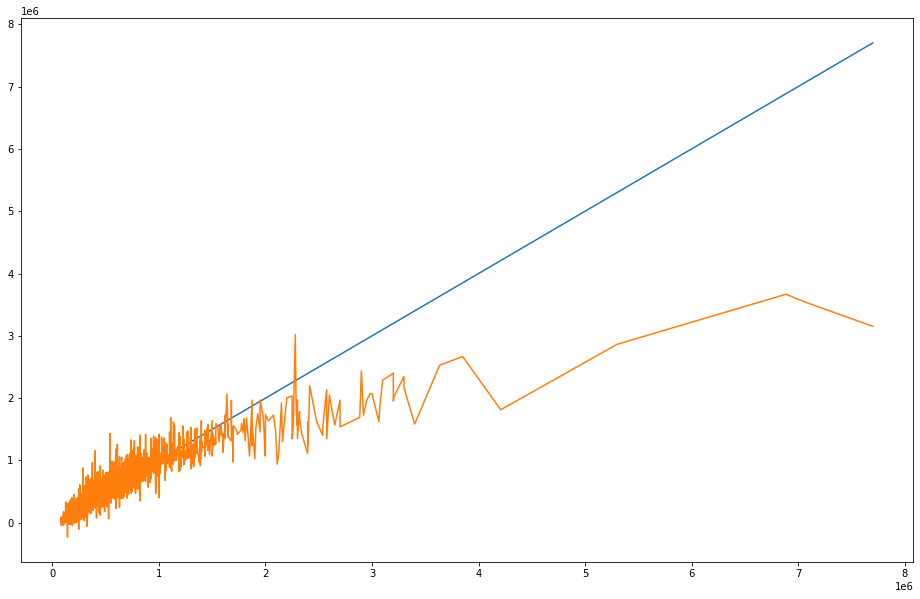

In [ ]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare["diff"] = (round(df_compare["Actual"] - df_compare["Predicted"])).astype(int)
df_compare.sort_values(by='Actual')

plt.figure(figsize=(16,10))
plt.plot(df_compare.sort_values(by='Actual')['Actual'],df_compare.sort_values(by='Actual')['Actual'])
plt.plot(df_compare.sort_values(by='Actual')['Actual'],df_compare.sort_values(by='Actual')['Predicted'])
plt.show()

## Test learning curve

In [176]:
round(df_house.shape[0]*0.1)

2161

In [177]:
train_sizes = [round(df_house.shape[0]*i/10000) for i in range(1,8001)]

In [ ]:
# train_sizes = [round(df_house.shape[0]*1e-4),
#                round(df_house.shape[0]*1e-3),
#                round(df_house.shape[0]*1e-2),
#                round(df_house.shape[0]*1e-1),
#                round(df_house.shape[0]*2e-1),
#                round(df_house.shape[0]*3e-1),
#                round(df_house.shape[0]*4e-1),
#                round(df_house.shape[0]*5e-1),
#                round(df_house.shape[0]*6e-1),
#                round(df_house.shape[0]*7e-1),
#                round(df_house.shape[0]*8e-1)]

In [179]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

numeric_features = df_house.drop([ "price"], axis=1).columns
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

categorical_features = ['zipcode']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression(copy_X= True, fit_intercept= True))])



X = df_house.drop(["price"], axis=1)
y = df_house["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Train accuracy :",clf.score(X_train, y_train))
print("Test accuracy :",clf.score(X_test, y_test))
print("R² = ", r2_score(y_test,y_pred))

# coeff_df = pd.DataFrame(clf.coef_, X.columns, columns=['Coefficient'])
# display(coeff_df)

Train accuracy : 0.8842825842666565
Test accuracy : 0.889055283652325
R² =  0.889055283652325


In [180]:
from sklearn.model_selection import learning_curve

warnings.filterwarnings("ignore")

features = X_train.columns
target = 'price'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = df_house[features],
y = df_house[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

warnings.filterwarnings("default")

In [181]:
print('Training scores:\n\n', train_scores)
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-5.20417043e-18 -1.49077799e-19 -1.49077799e-19 -1.49077799e-19
  -1.49077799e-19]
 [-3.50106952e-20 -2.16840434e-18 -2.16840434e-18 -2.16840434e-18
  -2.16840434e-18]
 ...
 [-3.90766026e+10 -3.96931922e+10 -4.15528601e+10 -4.13345708e+10
  -3.99232607e+10]
 [-3.90758875e+10 -3.96924016e+10 -4.15517984e+10 -4.13309397e+10
  -3.99263767e+10]
 [-3.90734048e+10 -3.96898578e+10 -4.15490108e+10 -4.13296434e+10
  -3.99504875e+10]]

Validation scores:

 [[-1.56831422e+11 -7.28942116e+12 -7.06575060e+12 -6.39172708e+12
  -6.57060285e+12]
 [-5.75649538e+12 -9.76955911e+11 -1.36484422e+12 -1.12742198e+12
  -1.15414554e+12]
 [-3.43208714e+13 -4.91960656e+12 -1.80726910e+12 -2.30524322e+12
  -3.08868215e+12]
 ...
 [-4.59211511e+10 -4.32947592e+10 -3.58416983e+10 -3.69335614e+10
  -4.31961548e+10]
 [-4.59215394e+10 -4.32951384e+10 -3.58423766e+10 -3.69333664e+10
  -4.32015440e+10]
 [-4.59219363

In [182]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 2       -0.000000e+00
4        1.160096e-18
6        1.741726e-18
9        6.525644e-16
11       5.912644e-14
             ...     
17282    4.032176e+10
17284    4.031905e+10
17286    4.031610e+10
17288    4.031548e+10
17290    4.031848e+10
Length: 8000, dtype: float64

Mean validation scores

 2        5.494867e+12
4        2.075973e+12
6        9.288334e+12
9        5.326938e+13
11       3.586081e+12
             ...     
17282    4.103876e+10
17284    4.103868e+10
17286    4.103746e+10
17288    4.103879e+10
17290    4.103575e+10
Length: 8000, dtype: float64


(0.0, 100000000000.0)

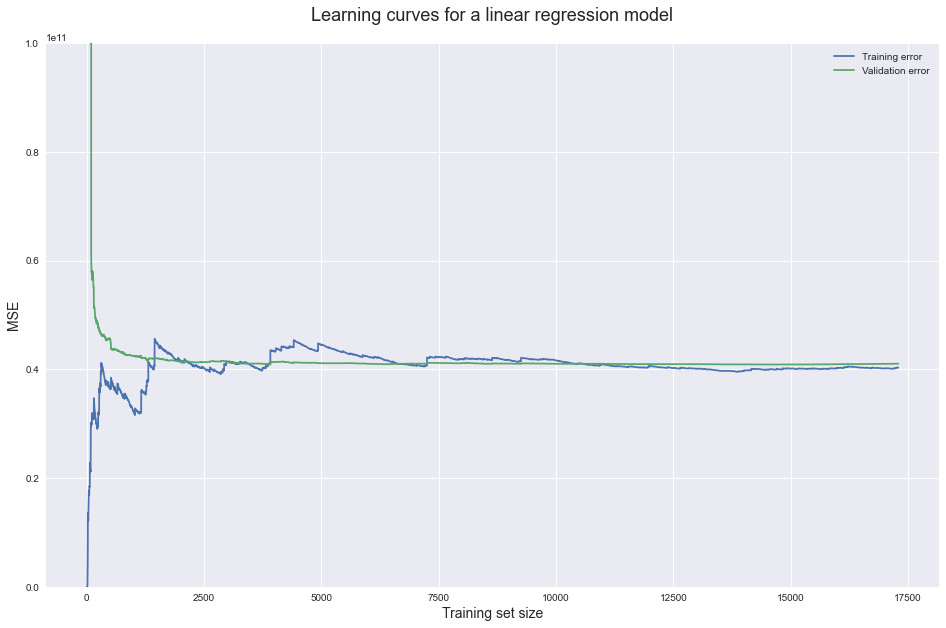

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1e11)

# DRAFT

In [187]:
import statsmodels.api as sm

df_stats = pd.get_dummies(df_house, columns=['zipcode', "waterfront"], drop_first=True)
# display(df_stats)

X = df_stats.drop(["price",
                   "sqft_lot",
                   "sqft_living15",
                   "sqft_lot15",
                   "lat",
                   "long",
                   "sqft_basement",
                   "zipcode_98003",
                   "zipcode_98022",
                   "zipcode_98070",
                   "zipcode_98198",
                   "zipcode_98042",
                   "zipcode_98032",
                   "zipcode_98030"], axis=1)
Y = df_stats['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

# X = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              3953.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                        0.00
Time:                        00:14:11   Log-Likelihood:                     -2.3081e+05
No. Observations:               17290   AIC:                                  4.618e+05
Df Residuals:                   17216   BIC:                                  4.623e+05
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [188]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare["diff"] = (round(df_compare["Actual"] - df_compare["Predicted"])).astype(int)

display(df_compare)

Actual     Predicted    diff
15544   459000.0  5.448730e+05  -85873
17454   445000.0  3.453538e+05   99646
21548  1057000.0  6.815060e+05  375494
3427    732350.0  6.391029e+05   93247
8809    235000.0  1.970516e+05   37948
...          ...           ...     ...
13597   965000.0  9.503279e+05   14672
9648    359950.0  3.884435e+05  -28494
18627   260000.0  2.166483e+05   43352
9553   1795000.0  1.615145e+06  179855
14200   418000.0  2.998336e+05  118166

[4323 rows x 3 columns]